<img src="images/oc-banner-project-04-1660-v1.png" width="1000" />

# Projet 4 - Construisez un modèle de scoring (Partie 1)

> 🎓 OpenClassrooms • Parcours [AI Engineer](https://openclassrooms.com/fr/paths/795-ai-engineer) | 👋 *Etudiant* : [David Scanu](https://www.linkedin.com/in/davidscanu14/)

## 📊 Partie 1 : Analyse exploratoire des données (EDA)

Ce notebook contient la première partie du projet, dédiée à l'**analyse exploratoire des données (EDA)**. L'objectif principal de cette section est de mieux comprendre la nature et la qualité des données afin d'identifier les transformations nécessaires pour la préparation, le feature engineering et le preprocessing des variables. 

L'analyse exploratoire nous permet de : 

1. **Explorer les caractéristiques des données** : 
   - Examiner la distribution des variables,
   - Identifier les valeurs manquantes et les outliers,
   - Analyser les relations entre les variables (corrélations, dépendances).

2. **Évaluer la pertinence des variables** : 
   - Identifier les colonnes redondantes ou inutiles à supprimer,
   - Comprendre les impacts potentiels des variables sur la cible (`TARGET`),
   - Détecter les variables nécessitant des transformations pour augmenter leur informativité.

3. **Préparer les transformations initiales** :
   - Traiter les valeurs manquantes,
   - Catégoriser et regrouper les modalités rares,
   - Créer de nouvelles variables dérivées pertinentes pour le modèle (ratios, regroupements).


## 📝 Contexte

Vous êtes Data Scientist au sein d'une société financière, nommée "Prêt à dépenser", qui propose des crédits à la consommation pour des personnes ayant peu ou pas d'historique de prêt. Pour accorder un crédit à la consommation, l’entreprise souhaite **mettre en œuvre un outil de “scoring crédit”** qui calcule la probabilité qu’un client le rembourse ou non, puis classifie la demande : crédit accordé ou refusé. Les chargés de relation client seront les utilisateurs de l’outil de scoring et ont besoin que le modèle soit facilement interprétable, avec une mesure de l’importance des variables influençant la décision.

## ⚡ Mission

>  Développer un outil de **scoring crédit** qui calcule la probabilité qu’un client le rembourse ou non, puis classifie la demande : **crédit accordé** ou **refusé**.

Le modèle doit être :
- **Interprétable** par les équipes qui vont l’utiliser
- Disposer d’une **mesure de l’importance des variables**
- Prendre en compte le **déséquilibre entre le nombre de bons et de moins bons clients**
- Prendre en compte le **coût métier** entre un faux négatif (FN) et un faux positif (FP)

## 💾 Jeux de données

Les données sont fournies par **Home Credit**, un service dédié à l'octroi de lignes de crédit (prêts) à la population non bancarisée.

Pour réaliser ce modèle, [un jeu de données](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Impl%C3%A9menter+un+mod%C3%A8le+de+scoring/Projet+Mise+en+prod+-+home-credit-default-risk.zip) contenant :

- un historique de prêts,
- un historique d’informations financières,
- des informations sur le comportement des emprunteurs (si l’emprunteur a fait défaut ou pas).

Les descriptions des colonnes du jeu de données sont disponibles ici : [p04-HomeCredit_columns_description | Google Sheet](https://docs.google.com/spreadsheets/d/1xHunq-9huLdwsmxzcC0foqXvP35-Riy_PlqViogj6wk/edit?usp=sharing)

## 🎯 Objectifs pédagogiques

- Créer les variables pertinentes d'un modèle d'apprentissage supervisé ou non-supervisé
- Évaluer les performances des modèles d’apprentissage supervisé selon différents critères
- Sélectionner et entraîner des modèles d’apprentissage supervisé

## 📊 Présentation

- Compréhension de la problématique métier
- Description du jeu de données
- Transformation du jeu de données (nettoyage et feature engineering)
- Comparaison et synthèse des résultats pour les modèles utilisés
- Interprétabilité du modèle
- Conclusion

## 📦 Livrables

- Un **Jupyter Notebook** d'analyse exploratoire et de feature engineering
- Un **Jupyter Notebook** présentant les différentes parties du travail de modélisation
- Une présentation (Google Slide)

## 🙋‍♂️ Soutenance

- **Présentation** (20 minutes)
  - Rappel de la problématique, présentation du jeu de données et analyse exploratoire (5 minutes).
  - Présentation de votre approche méthodologique et de la synthèse des résultats (15 minutes).
- **Discussion** (5 minutes)
  - L’évaluateur, jouant le rôle de Michaël, vous challengera sur vos choix.
- **Débriefing** (5 minutes)
  - À la fin de la soutenance, l'évaluateur arrêtera de jouer le rôle de Michaël pour vous permettre de débriefer ensemble.

## ⚙️ Installation et importation des bibliothèques nécessaires

In [1]:
import sklearn
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st # perform correlation calculation
import plotly.express as px

In [2]:
# Apply the default theme for seaborn
sns.set_theme()

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## ⭐ Etapes typiques d'un projet de data science

<img src="https://raw.githubusercontent.com/ashishpatel26/Amazing-Feature-Engineering/refs/heads/master/images/workflow2.png" />

1. **Analyse exploratoire des données (EDA):**
   * Visualisation des données (histogrammes, boxplots, nuages de points).
   * Calcul des statistiques descriptives (moyenne, médiane, écart-type, corrélations).
   * Identification des relations entre les variables.
   * Détection des anomalies.

2. **Nettoyage et formatage des données:**
   * Identification et correction des erreurs (valeurs aberrantes, doublons, incohérences).

3. **Ingénierie des caractéristiques:**
   * Création de nouvelles variables pertinentes (interactions, transformations).
   * Sélection des variables (Feature selection) : Sélection manuelle, méthodes statistiques, méthodes basées sur l'apprentissage.

4. **Preprocessing**
   * Normalisation ou standardisation des données numériques (gestion des outliers).
   * Conversion des variables catégorielles en format numérique (encodage one-hot, label encoding).
   * Gestion des valeurs manquantes (suppression, imputation, création d'une catégorie spécifique).

5. **Sélection de modèle:**
   * Choix d'une variété de modèles d'apprentissage automatique (régression linéaire, forêts aléatoires, réseaux de neurones, etc.).
   * Entraînement des modèles sur les données d'entraînement.

6. **Évaluation des modèles:**
   * Choix d'une métrique de performance appropriée (MSE, RMSE, accuracy, F1-score, etc.).
   * Comparaison des performances des modèles sur un ensemble de validation.

7. **Ajustement des hyperparamètres:**
   * Utilisation de techniques d'optimisation (grid search, random search, optimisation bayésienne).
   * Recherche des meilleurs paramètres pour le modèle sélectionné.

8. **Évaluation finale:**
   * Évaluation du modèle final sur l'ensemble de test pour une évaluation plus réaliste.

9. **Interprétation des résultats:**
   * Analyse de l'importance des caractéristiques.
   * Explication des prédictions du modèle.
   * Identification des biais potentiels.

9. **Conclusion et documentation:**
   * Rédaction d'une présentation claire présentant les résultats.
   * Visualisation des résultats clés.

## 🥗 Jeu de données

Il existe 7 sources de données différentes :

- **application_train/application_test** : Les principales données d'entraînement et de test contenant des informations sur chaque demande de prêt à Home Credit. Chaque prêt possède sa propre ligne et est identifié par la variable `SK_ID_CURR`. Les données d'entraînement de la demande sont fournies avec la cible `TARGET` indiquant 0 : le prêt a été remboursé, 1 : le prêt n'a pas été remboursé.
- **bureau** : Données concernant les crédits précédents du client auprès d'autres institutions financières. Chaque crédit précédent possède sa propre ligne dans le bureau, mais un prêt dans les données de demande peut avoir plusieurs crédits précédents.
- **bureau_balance** : Données mensuelles sur les crédits précédents dans le bureau. Chaque ligne correspond à un mois d'un crédit précédent, et un seul crédit précédent peut avoir plusieurs lignes, une pour chaque mois de la durée du crédit.
- **previous_application** : Demandes de prêts précédentes à Home Credit de clients ayant des prêts dans les données de demande. Chaque prêt actuel dans les données de demande peut avoir plusieurs prêts précédents. Chaque demande précédente possède une ligne et est identifiée par la caractéristique `SK_ID_PREV`.
- **POS_CASH_BALANCE** : Données mensuelles sur les précédents prêts à la consommation ou en espèces que les clients ont eus avec Home Credit. Chaque ligne correspond à un mois d'un précédent prêt à la consommation ou en espèces, et un seul prêt précédent peut avoir plusieurs lignes.
- **credit_card_balance** : Données mensuelles sur les précédentes cartes de crédit que les clients ont eues avec Home Credit. Chaque ligne correspond à un mois d'un solde de carte de crédit, et une seule carte de crédit peut avoir plusieurs lignes.
- **installments_payment** : historique des paiements pour les prêts précédents à Home Credit. Il y a une ligne pour chaque paiement effectué et une ligne pour chaque paiement manqué.

Deux fichiers additionnels :

- **sample_submission** : Exemple de fichier à soumettre pour la compétition Kaggle.
- **HomeCredit_columns_description** : Description des colonnes de la demande de crédit : [p04-HomeCredit_columns_description | Google Sheet](https://docs.google.com/spreadsheets/d/1xHunq-9huLdwsmxzcC0foqXvP35-Riy_PlqViogj6wk/edit?usp=sharing).

<img src="https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png" width="1000" />

### Téléchargement et extraction du fichier .zip.

In [4]:
import os

# Check if the directory exists
if not os.path.exists('./content/data'):
    # Execute the commands if the directory does not exist
    os.system('wget "https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Impl%C3%A9menter+un+mod%C3%A8le+de+scoring/Projet+Mise+en+prod+-+home-credit-default-risk.zip" -O temp.zip')
    os.system('mkdir -p ./content/data')
    os.system('unzip -o temp.zip -d ./content/data')
    os.system('rm temp.zip')
    os.system('rm -rf ./content/data/__MACOSX')
else:
    print("Directory ./content/data already exists.")

Directory ./content/data already exists.


### Liste des fichiers disponibles

In [5]:
data_folderpath = "./content/data/"

In [6]:
import os
import glob

def get_csv_filepaths(folder_path):
  """
  Returns a list of filepaths for all .csv files in the given folder.
  """
  csv_filepaths_dict = {}
  for filepath in glob.glob(os.path.join(folder_path, '*.csv')):
    filename = os.path.basename(filepath)
    filename = os.path.splitext(filename)[0]
    csv_filepaths_dict[filename] = filepath
  return csv_filepaths_dict

csv_files_dict = get_csv_filepaths(data_folderpath)

csv_files_df = pd.DataFrame(list(csv_files_dict.items()), columns=['filename', 'filepath']).sort_values(by='filename')
csv_files_df

,filename,filepath
4,HomeCredit_columns_description,./content/data/HomeCredit_columns_description.csv
5,POS_CASH_balance,./content/data/POS_CASH_balance.csv
2,application_test,./content/data/application_test.csv
8,application_train,./content/data/application_train.csv
0,bureau,./content/data/bureau.csv
3,bureau_balance,./content/data/bureau_balance.csv
1,credit_card_balance,./content/data/credit_card_balance.csv
9,installments_payments,./content/data/installments_payments.csv
7,previous_application,./content/data/previous_application.csv
6,sample_submission,./content/data/sample_submission.csv


### Importation des fichiers .csv dans des DataFrames

In [7]:
import chardet

def csv_to_df(filepath):
  """
  Lit un seul fichier CSV dans un Pandas DataFrame, détectant l'encodage correct pour éviter les erreurs.

  - Args:
    - Le chemin du fichier .csv.
  - Returns:
    - Un DataFrame.
  """
  try:
    # Dectect file encoding
    with open(filepath, 'rb') as file:
      result = chardet.detect(file.read(10000))  # Analyze the first 10KB
      encoding = result['encoding']
      print(f"Detected encoding: {encoding}")
    # Read the .csv to a DataFrame
    df = pd.read_csv(filepath, encoding=encoding)
  except FileNotFoundError:
      print(f"Error: File not found at path: '{filepath}'.")
      # Handle the error appropriately (e.g., skip the file, raise an exception, etc.)
  except pd.errors.EmptyDataError:
      print(f"Error: Empty CSV file at path: '{filepath}'.")
      # Handle empty file error
  except pd.errors.ParserError:
      print(f"Error: ParserError while reading CSV at path: '{filepath}'.")
      # Handle parser error
  except Exception as e:  # Catch other potential errors during file reading
      print(f"An unexpected error occurred while reading '{filepath}': {e}")

  return df

### Données d'entraînement

In [8]:
application_train_raw = csv_to_df(csv_files_dict["application_train"])
print('Forme des données d’entraînement : ', application_train_raw.shape)
print()
application_train_raw.head()

Detected encoding: ascii
Forme des données d’entraînement :  (307511, 122)



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Les données d'entraînement contiennent 307 511 observations (chacune étant un prêt distinct) et 122 variables, y compris la cible `TARGET` (l'étiquette que nous voulons prédire).

---

## 👀 Étape 1 - Analyse exploratoire

- **Analyse exploratoire** du jeu de données pour comprendre sa structure et ses caractéristiques.
- Identification des opportunités de **Feature engineering** pour améliorer la performance du modèle.
- Construire au moins **trois nouvelles variables** à partir des variables existantes qui te semblent pertinentes pour améliorer le pouvoir prédictif du modèle.

### Recommandations

- Assurez-vous d'utiliser le bon fichier (application_train.csv) pour l'analyse exploratoire.
- Vérifiez les valeurs manquantes et les valeurs extrêmes dans le jeu de données.

### Choix du kernal Kaggle

- https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction/notebook


---


### Compréhension des variables

 La compréhension des données est essentielle pour effectuer un **feature engineering** efficace et garantir un **prétraitement optimal**.

La compréhension des variables repose sur trois piliers principaux :  
1. Connaissance métier
2. [Description des colonnes | Google Sheet](https://docs.google.com/spreadsheets/d/1xHunq-9huLdwsmxzcC0foqXvP35-Riy_PlqViogj6wk/edit?usp=sharing)
3. Observation des données

#### La cible : difficuté de paiement `TARGET`

La variable cible est la **difficuté de paiement** :
- `1` : **client en difficulté de paiement**, il/elle a eu un retard de paiement de plus de X jours sur au moins une des Y premières échéances du prêt dans notre échantillon
- `0` : tous les autres cas



#### Types de variables identifiées

1. 🔴 **Variables catégorielles**  
   - Ce sont des variables qualitatives qui représentent des catégories distinctes.  
   - Exemple : `NAME_CONTRACT_TYPE`, qui indique le type de contrat (Cash loans, Revolving loans).

2. 🟠 **Variables binaires**  
   - Variables numériques ne prenant que deux valeurs possibles (0 ou 1) pour indiquer une propriété ou un état.  
   - Exemple : `FLAG_OWN_CAR`, qui indique si le client possède une voiture.

3. 🟡 **Variables quantitatives**  
   - Variables numériques représentant une quantité mesurable.  
   - Exemple : `AMT_INCOME_TOTAL`, qui correspond au revenu total du client.

4. 🟢 **Variables quantitatives normalisées**  
   - Variables quantitatives transformées pour les ramener dans une plage ou une distribution standardisée.  
   - Exemple : des ratios financiers tels que le rapport `AMT_CREDIT / AMT_INCOME_TOTAL`.

5. 🔵 **Variables quantitatives ordinales**   ("ratings")
   - Variables numériques reflétant un classement ou une hiérarchie où l’ordre des valeurs a une signification, mais sans équidistance entre les niveaux.  
   - Exemple : `REGION_RATING_CLIENT`, qui classe les régions selon leur qualité.

6. 🟣 **Variables cycliques**  
   - Variables numériques ayant une nature cyclique, où les extrémités se rejoignent (exemple : heures, jours).  
   - Exemple : `HOUR_APPR_PROCESS_START`, représentant l’heure de la demande de prêt.





In [9]:
application_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
application_train_raw.head(12)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

#### 🔴 Variables catégorielles

In [11]:
# Verified ✅
cat_cols = [
  'FLAG_OWN_CAR',
  'FLAG_OWN_REALTY',
  'NAME_CONTRACT_TYPE',
  'EMERGENCYSTATE_MODE',
  'CODE_GENDER',
  'NAME_TYPE_SUITE',
  'NAME_INCOME_TYPE',
  'NAME_EDUCATION_TYPE',
  'NAME_FAMILY_STATUS',
  'NAME_HOUSING_TYPE',
  'OCCUPATION_TYPE',
  'WEEKDAY_APPR_PROCESS_START',
  'ORGANIZATION_TYPE',
  'FONDKAPREMONT_MODE',
  'HOUSETYPE_MODE',
  'WALLSMATERIAL_MODE'
]
len(cat_cols)

16

In [12]:
categorical_df = application_train_raw[cat_cols]
categorical_df.head(10)

,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_CONTRACT_TYPE,EMERGENCYSTATE_MODE,CODE_GENDER,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE
0,N,Y,Cash loans,No,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick"
1,N,N,Cash loans,No,F,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block
2,Y,Y,Revolving loans,NaN,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN
3,N,Y,Cash loans,NaN,F,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN
4,N,Y,Cash loans,NaN,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN
5,N,Y,Cash loans,NaN,M,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Other,NaN,NaN,NaN
6,Y,Y,Cash loans,NaN,F,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Accountants,SUNDAY,Business Entity Type 3,NaN,NaN,NaN
7,Y,Y,Cash loans,NaN,M,Unaccompanied,State servant,Higher education,Married,House / apartment,Managers,MONDAY,Other,NaN,NaN,NaN
8,N,Y,Cash loans,NaN,F,Children,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,WEDNESDAY,XNA,NaN,NaN,NaN
9,N,Y,Revolving loans,NaN,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,THURSDAY,Electricity,NaN,NaN,NaN


In [13]:
# Liste des variables qualitatives avec le nombre de modalités dans un dataframe par ordre décroissant
def print_cat_cols_modalities(df):
  # Calculate the number of unique values for each categorical column
  cat_cols_modalities = {}
  for col in cat_cols:
      cat_cols_modalities[col] = df[col].nunique()
  # Create a DataFrame from the dictionary
  cat_cols_modalities_df = pd.DataFrame(list(cat_cols_modalities.items()), columns=['Colonnes', 'Nombre de modalités'])
  # Sort the DataFrame by the number of modalities in descending order
  cat_cols_modalities_df = cat_cols_modalities_df.sort_values(by='Nombre de modalités', ascending=False, ignore_index=True)
  # Display the result
  print(cat_cols_modalities_df)

print_cat_cols_modalities(application_train_raw)

                      Colonnes  Nombre de modalités
0            ORGANIZATION_TYPE                   58
1              OCCUPATION_TYPE                   18
2             NAME_INCOME_TYPE                    8
3              NAME_TYPE_SUITE                    7
4   WEEKDAY_APPR_PROCESS_START                    7
5           WALLSMATERIAL_MODE                    7
6            NAME_HOUSING_TYPE                    6
7           NAME_FAMILY_STATUS                    6
8          NAME_EDUCATION_TYPE                    5
9           FONDKAPREMONT_MODE                    4
10                 CODE_GENDER                    3
11              HOUSETYPE_MODE                    3
12                FLAG_OWN_CAR                    2
13             FLAG_OWN_REALTY                    2
14          NAME_CONTRACT_TYPE                    2
15         EMERGENCYSTATE_MODE                    2


In [14]:
# Afficher les modalités des variables catégorielles
for cat in cat_cols:
  print(cat)
  print(application_train_raw[cat].unique())
  print()

FLAG_OWN_CAR
['N' 'Y']

FLAG_OWN_REALTY
['Y' 'N']

NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans']

EMERGENCYSTATE_MODE
['No' nan 'Yes']

CODE_GENDER
['M' 'F' 'XNA']

NAME_TYPE_SUITE
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']

NAME_INCOME_TYPE


['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

NAME_EDUCATION_TYPE
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

NAME_FAMILY_STATUS
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']

NAME_HOUSING_TYPE
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']

OCCUPATION_TYPE
['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']

WEEKDAY_APPR_PROCESS_START
['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY']

ORGANIZATION_TYPE
['Business Entity Type 3' 'School' 'Government' 'Religion' 'Other' 'XNA'
 'Electr

#### 🟠 Variables booléennes binaires

Les variables binaires sont des variables numériques qui ne prennent que deux valeurs possibles : 0 ou 1. Elles sont souvent utilisées pour représenter la présence ou l'absence d'une caractéristique.

In [15]:
# Verified ✅
binary_cols = [
  'REG_REGION_NOT_LIVE_REGION',
  'REG_REGION_NOT_WORK_REGION',
  'REG_CITY_NOT_LIVE_CITY',
  'REG_CITY_NOT_WORK_CITY',
  'LIVE_REGION_NOT_WORK_REGION',
  'LIVE_CITY_NOT_WORK_CITY',
  'FLAG_MOBIL',
  'FLAG_EMP_PHONE',
  'FLAG_WORK_PHONE',
  'FLAG_CONT_MOBILE',
  'FLAG_PHONE',
  'FLAG_EMAIL',
  'FLAG_DOCUMENT_2',
  'FLAG_DOCUMENT_3',
  'FLAG_DOCUMENT_4',
  'FLAG_DOCUMENT_5',
  'FLAG_DOCUMENT_6',
  'FLAG_DOCUMENT_7',
  'FLAG_DOCUMENT_8',
  'FLAG_DOCUMENT_9',
  'FLAG_DOCUMENT_10',
  'FLAG_DOCUMENT_11',
  'FLAG_DOCUMENT_12',
  'FLAG_DOCUMENT_13',
  'FLAG_DOCUMENT_14',
  'FLAG_DOCUMENT_15',
  'FLAG_DOCUMENT_16',
  'FLAG_DOCUMENT_17',
  'FLAG_DOCUMENT_18',
  'FLAG_DOCUMENT_19',
  'FLAG_DOCUMENT_20',
  'FLAG_DOCUMENT_21'
]
len(binary_cols)

32

In [16]:
application_train_raw[binary_cols].head()

,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVE_CITY_NOT_WORK_CITY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


#### 🟡 Variables quantitatives

Nous **vérifions chaque variable dans la description des colonnes** pour nous assurer que chaque variable mésure une quantité comme le nombre de jours en emploi `DAYS_EMPLOYED` ou l'age de la voiture du client `OWN_CAR_AGE`.

In [17]:
# Verified ✅
quantity_cols = [
  'AMT_CREDIT',
  'AMT_ANNUITY',
  'AMT_GOODS_PRICE',
  'AMT_INCOME_TOTAL',
  'CNT_CHILDREN',
  'CNT_FAM_MEMBERS',
  'OWN_CAR_AGE',
  'DAYS_BIRTH',
  'DAYS_REGISTRATION',
  'DAYS_ID_PUBLISH',
  'DAYS_EMPLOYED',
  'DAYS_LAST_PHONE_CHANGE',
  'DEF_30_CNT_SOCIAL_CIRCLE',
  'DEF_60_CNT_SOCIAL_CIRCLE',
  'OBS_60_CNT_SOCIAL_CIRCLE',
  'OBS_30_CNT_SOCIAL_CIRCLE',
  'AMT_REQ_CREDIT_BUREAU_HOUR',
  'AMT_REQ_CREDIT_BUREAU_DAY',
  'AMT_REQ_CREDIT_BUREAU_WEEK',
  'AMT_REQ_CREDIT_BUREAU_YEAR',
  'AMT_REQ_CREDIT_BUREAU_QRT',
  'AMT_REQ_CREDIT_BUREAU_MON'
]
len(quantity_cols)

22

In [18]:
application_train_raw[quantity_cols].head()

,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,OWN_CAR_AGE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON
0,406597.5,24700.5,351000.0,202500.0,0,1.0,NaN,-9461,-3648.0,-2120,-637,-1134.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1293502.5,35698.5,1129500.0,270000.0,0,2.0,NaN,-16765,-1186.0,-291,-1188,-828.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,135000.0,6750.0,135000.0,67500.0,0,1.0,26.0,-19046,-4260.0,-2531,-225,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,312682.5,29686.5,297000.0,135000.0,0,2.0,NaN,-19005,-9833.0,-2437,-3039,-617.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4,513000.0,21865.5,513000.0,121500.0,0,1.0,NaN,-19932,-4311.0,-3458,-3038,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 🟢 Variables quantitatives normalisées

D'après la description des colonnes, ces variables sont quantatives mais normalisées (entre 0 et 1).

En python, nous vérifions que toutes les variables de `normalized_cols` sont numériques et comprises entre 0 et 1.

**Erreurs dans la documentation** : ces variables sont classées comme normalisées dans la description alors que ce sont des catégories :

- `FONDKAPREMONT_MODE`
- `HOUSETYPE_MODE`
- `WALLSMATERIAL_MODE`
- `EMERGENCYSTATE_MODE`

Nous les supprimons de `normalized_cols`.



In [19]:
# Verified ✅
normalized_cols = [
  "REGION_POPULATION_RELATIVE",
  "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3",
  "APARTMENTS_AVG", "BASEMENTAREA_AVG", "YEARS_BEGINEXPLUATATION_AVG",
  "YEARS_BUILD_AVG", "COMMONAREA_AVG", "ELEVATORS_AVG",
  "ENTRANCES_AVG", "FLOORSMAX_AVG", "FLOORSMIN_AVG",
  "LANDAREA_AVG", "LIVINGAPARTMENTS_AVG", "LIVINGAREA_AVG",
  "NONLIVINGAPARTMENTS_AVG", "NONLIVINGAREA_AVG",
  "APARTMENTS_MODE", "BASEMENTAREA_MODE", "YEARS_BEGINEXPLUATATION_MODE",
  "YEARS_BUILD_MODE", "COMMONAREA_MODE", "ELEVATORS_MODE",
  "ENTRANCES_MODE", "FLOORSMAX_MODE", "FLOORSMIN_MODE",
  "LANDAREA_MODE", "LIVINGAPARTMENTS_MODE", "LIVINGAREA_MODE",
  "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAREA_MODE",
  "APARTMENTS_MEDI", "BASEMENTAREA_MEDI", "YEARS_BEGINEXPLUATATION_MEDI",
  "YEARS_BUILD_MEDI", "COMMONAREA_MEDI", "ELEVATORS_MEDI",
  "ENTRANCES_MEDI", "FLOORSMAX_MEDI", "FLOORSMIN_MEDI",
  "LANDAREA_MEDI", "LIVINGAPARTMENTS_MEDI", "LIVINGAREA_MEDI",
  "NONLIVINGAPARTMENTS_MEDI", "NONLIVINGAREA_MEDI", "TOTALAREA_MODE"
]
len(normalized_cols)

47

Nous vérifions que toutes les variables dans `normalized_cols` sont bien numériques et comprises entre 0 et 1.

In [20]:
# @title
def check_normalized_cols(df):
  normalized_df = df[normalized_cols]

  # Check for non-numeric values
  non_numeric_cols = normalized_df.select_dtypes(exclude=['number']).columns
  if len(non_numeric_cols) > 0:
      print(f"The following columns are not numeric: {', '.join(non_numeric_cols)}")
  else:
    # Check if values are within the range [0, 1]
    out_of_range = []
    for col in normalized_cols:
        min_val = normalized_df[col].min()
        max_val = normalized_df[col].max()
        if not (0 <= min_val <= 1 and 0 <= max_val <= 1):
            out_of_range.append(col)

    if out_of_range:
        print("Les valeurs des colonnes suivantes ne sont pas comprises entre 0 et 1 :")
        for col in out_of_range:
          print(f"- {col}: min={normalized_df[col].min()}, max={normalized_df[col].max()}")
    else:
        print("Toutes les colonnes de `normalized_cols` sont numériques et comprises entre 0 et 1.")

check_normalized_cols(application_train_raw)

Toutes les colonnes de `normalized_cols` sont numériques et comprises entre 0 et 1.


In [21]:
application_train_raw[normalized_cols].head()

,REGION_POPULATION_RELATIVE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE
0,0.018801,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,0.0149
1,0.003541,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,0.0714
2,0.010032,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.008019,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.028663,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 🔵 Variables quantitatives ordinales ("ratings")

Ce sont des variables quantitatives ordinales. Elles représentent un classement.

In [22]:
rating_cols = [
  'REGION_RATING_CLIENT_W_CITY',
  'REGION_RATING_CLIENT',
]

In [23]:
# prompt: Affiche les valeurs uniques pour application_train_raw[rating_cols]
def print_unique_values(df: pd.DataFrame, cols: list) -> None :
  print(df[cols].nunique())
  print()
  for col in cols:
      print(f"- Valeurs uniques pour {col} : {df[col].unique()}")

print_unique_values(application_train_raw, rating_cols)

REGION_RATING_CLIENT_W_CITY    3
REGION_RATING_CLIENT           3
dtype: int64

- Valeurs uniques pour REGION_RATING_CLIENT_W_CITY : [2 1 3]
- Valeurs uniques pour REGION_RATING_CLIENT : [2 1 3]


In [24]:
application_train_raw[rating_cols].head()

,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT
0,2,2
1,1,1
2,2,2
3,2,2
4,2,2


#### 🟣 Variables cycliques


`HOUR_APPR_PROCESS_START`

L’heure de la demande de prêt est une **valeur numérique**, mais elle présente des caractéristiques qui suggèrent qu’elle pourrait être mieux traitée comme une **variable catégorielle** plutôt que comme une quantité continue pure.

Caractéristiques cycliques : Les heures d’une journée ont une nature cyclique.

In [25]:
cycle_cols = [
  'HOUR_APPR_PROCESS_START'
]

In [26]:
application_train_raw[cycle_cols].head()

,HOUR_APPR_PROCESS_START
0,10
1,11
2,9
3,17
4,11


#### ✅ Vérification

In [27]:
application_train_raw.shape

(307511, 122)

In [28]:
# Ensemble des colonnes sélectionnées et triées
selected_cols = [
  *cat_cols,
  *binary_cols,
  *quantity_cols,
  *normalized_cols,
  *rating_cols,
  *cycle_cols
]
len(selected_cols)

120

Vérifications :
- Doublons dans les variables sélectionnées
- Colonnes dans le DataFrame mais absente des variables sélectionnées

In [29]:
def verif(df, selected_cols):

  duplicates = pd.Series(selected_cols).value_counts()[pd.Series(selected_cols).value_counts() > 1].index.tolist()
  if len(duplicates) > 0:
    print("Valeurs en double dans les variables sélectionnées :", duplicates)
  else:
    print("Aucunes valeurs en double trouvées dans les variables sélectionnées.")

  # Convert lists to sets for efficient comparison
  total_cols_set = set(df.columns.tolist())
  cols_set = set(selected_cols)

  # Find elements in df.columns but not in selected_cols
  diff_total_cols = total_cols_set - cols_set

  print()
  print("Variables dans le DataFrame mais absente des variables sélectionnées :")
  print(diff_total_cols)

In [30]:
verif(application_train_raw, selected_cols)

Aucunes valeurs en double trouvées dans les variables sélectionnées.

Variables dans le DataFrame mais absente des variables sélectionnées :
{'SK_ID_CURR', 'TARGET'}


En faisant la somme de nos listes de variables, nous obtenons bien 121 colonnes, c-à-d tous les colonnes du jeu de données sauf la cible `TARGET`
et l'identifiant `SK_ID_CURR` (inutile).

#### ❌ Suppression de variables

**Featuring Engineering recommandé** :
- Supprimer les colonners inutiles comme les identifiants `SK_ID_CURR`

In [31]:
application_train_raw.shape

(307511, 122)

In [32]:
application_train_temp = application_train_raw.copy()

In [33]:
def remove_cols(df: pd.DataFrame, cols: list) -> pd.DataFrame:
    """
    Remove specified columns from a DataFrame

    Parameters:
    - df: Input DataFrame
    - cols: List of column names to drop

    Returns:
    - DataFrame with specified columns removed
    """
    # Check if all specified columns exist in the DataFrame
    existing_cols = [col for col in cols if col in df.columns]
    # Drop existing columns
    df_dropped = df.drop(columns=existing_cols)

    return df_dropped

### Distribution de la colonne cible `TARGET`

In [34]:
# Distribution de la colonne cible TARGET avec des visualisations
target_counts = application_train_temp['TARGET'].value_counts()
print(round((target_counts / len(application_train_temp) * 100), 2))

TARGET
0    91.93
1     8.07
Name: count, dtype: float64


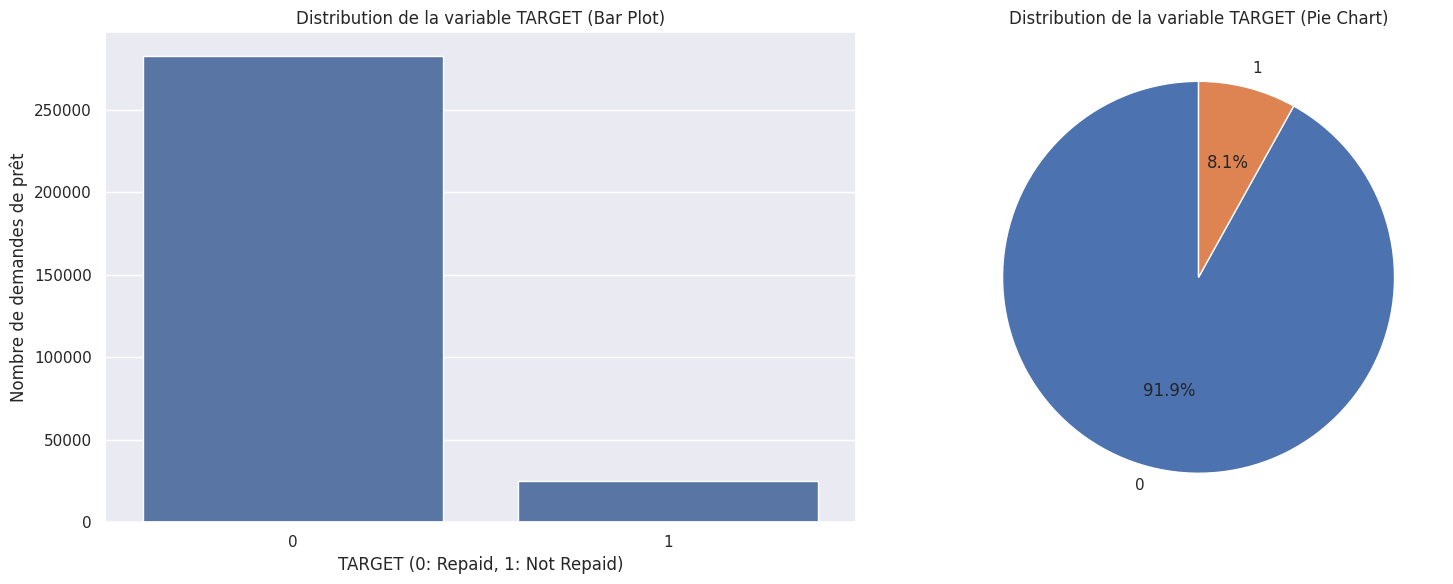

In [35]:
# Create a figure and axes for the subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
sns.countplot(x='TARGET', data=application_train_temp, ax=axes[0])
axes[0].set_title('Distribution de la variable TARGET (Bar Plot)')
axes[0].set_xlabel('TARGET (0: Repaid, 1: Not Repaid)')
axes[0].set_ylabel('Nombre de demandes de prêt')

# Pie chart
axes[1].pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Distribution de la variable TARGET (Pie Chart)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

À partir de ces informations, nous voyons qu'il y a un problème de **déséquilibre des classes**. Il y a beaucoup plus de prêts remboursés à temps que de prêts non remboursés.

- Ré-échantillonnage
- Indicateur statistiques : Courbe de ROC

### Impact des revenus sur les difficultés de paiement

**Impact des revenus sur la cible**  

- `AMT_INCOME_TOTAL` : Cette variable représente le revenu total du client. Elle est une donnée quantitative qui peut avoir un impact direct sur la capacité de remboursement du client et donc sur la probabilité d'un défaut. Une analyse approfondie permettra de vérifier si les clients ayant un revenu plus élevé sont moins susceptibles de faire défaut.

- `NAME_INCOME_TYPE` : Cette variable catégorielle décrit la source principale de revenus du client (par exemple, travail salarié, activité indépendante). Elle pourrait révéler des tendances intéressantes, comme un risque de défaut plus élevé chez les clients avec des revenus instables ou non réguliers (ex. : freelances ou entrepreneurs).  

In [36]:
application_train_income_capped = application_train_temp[application_train_temp['AMT_INCOME_TOTAL'] < 600000]

In [37]:
application_train_income_capped.shape

(305904, 122)

#### Distribution des revenus

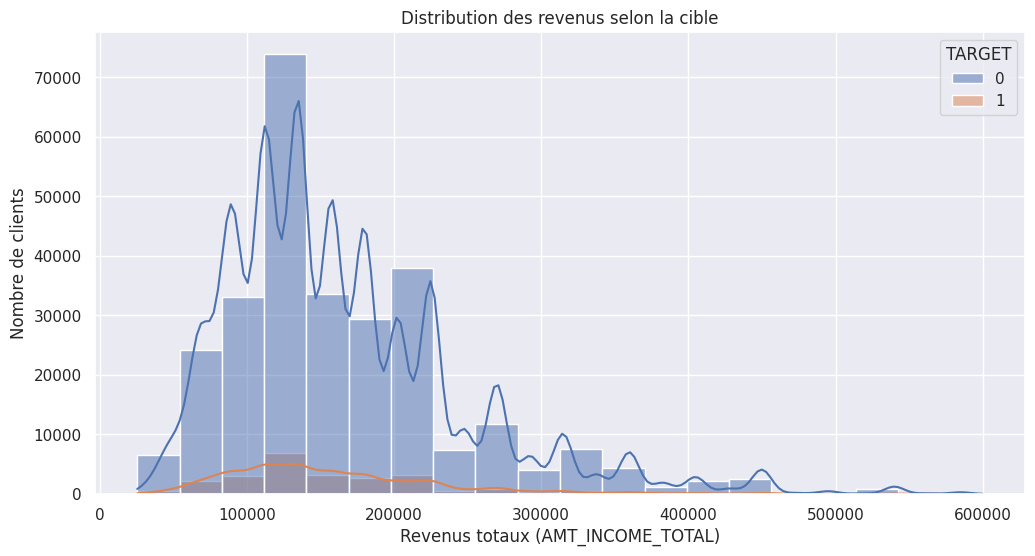

In [38]:
# Visualisation de la distribution des revenus roupé par TARGET avec seaborn
plt.figure(figsize=(12, 6))
sns.histplot(data=application_train_income_capped, x='AMT_INCOME_TOTAL', hue='TARGET', kde=True, bins=20) # Increased bins for better detail
plt.title('Distribution des revenus selon la cible')
plt.xlabel('Revenus totaux (AMT_INCOME_TOTAL)')
plt.ylabel('Nombre de clients')
plt.show()

<Figure size 1200x600 with 0 Axes>

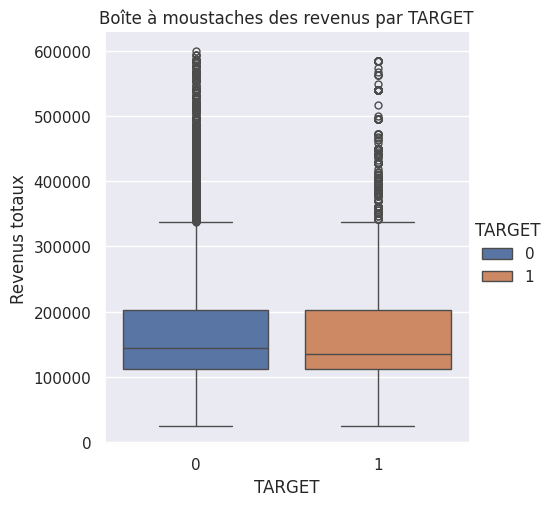

In [39]:
# Boite a moustache de distribution des revenu par TARGET
plt.figure(figsize=(12, 6))
sns.catplot(data=application_train_income_capped, y='AMT_INCOME_TOTAL',  x='TARGET', hue="TARGET", kind="box")
plt.title('Boîte à moustaches des revenus par TARGET')
plt.ylabel('Revenus totaux')
plt.xlabel('TARGET')
plt.show()

**Interprétation** :

- La distribution des revenus ne semble pas montrer un lien significatif avec `TARGET` c-à-d "client en difficulté de paiement".

#### Taux de difficulté de paiement par tranches de revenu

> **Taux de difficulté de paiement*** : Nombre de client ayant des difficultés de paiement sur le nombre de client totaux (moyenne de `TARGET`).

Nous créeons des **tranche de revenus** par discrétisation (ou binning). Cela consiste à transformer une variable continue, comme le revenu total du client (`AMT_INCOME_TOTAL`), en une variable catégorielle en regroupant ses valeurs en intervalles ou "tranches".

Proposition de binning (par tranche de 50 000 avec une catégorie > 400 000) :
- **Très faible** : 0 à 50 000.  
- **Faible** : 50 001 à 100 000.  
- **Moyen-bas** : 100 001 à 150 000.  
- **Moyen** : 150 001 à 200 000.  
- **Moyen-haut** : 200 001 à 250 000.  
- **Élevé** : 250 001 à 300 000.  
- **Très élevé** : 300 001 à 350 000.  
- **Exceptionnel** : 350 001 à 400 000.  
- **Ultra-élevé** : Plus de 400 000.

**Remarque**
La dernière tranche utilise `float('inf')` pour couvrir les valeurs supérieures à 400 000. Cela garantit qu'aucune valeur n'est exclue, même pour des revenus très élevés.





In [40]:
def create_amt_income_groups(df):
  """
  Créer des catégories pour une colonne continue.

  Parameters:
  - df: DataFrame
  - source_col: Source column name
  - new_cat_col: New categorical column name
  - bins: Bin edges
  - labels: Bin labels
  - right: Include right edge of bin (default True)
  """
  bins = [0, 150000, 200000, 250000, 300000, 350000, 400000, float('inf')]
  labels = ['Faible', 'Moyen', 'Moyen-haut', 'Élevé', 'Très élevé', 'Exceptionnel', 'Ultra-élevé']
  if 'AMT_INCOME_TOTAL' in df.columns:
    # Création de la colonne `AMT_INCOME_GROUP`
    df['AMT_INCOME_GROUP'] = pd.cut(df['AMT_INCOME_TOTAL'], bins=bins, labels=labels, right=True)
    # Suppression de la colonne `AMT_INCOME_TOTAL`
    df.drop(columns=['AMT_INCOME_TOTAL'], inplace=True)
  return df

application_train_temp = create_amt_income_groups(application_train_temp)

In [41]:
application_train_temp.shape

(307511, 122)

In [42]:
def target_rate_by_cat(df, cat_col):
    # Group by category and count targets
    grouped = df.groupby([cat_col, 'TARGET'], observed=True).size().unstack(fill_value=0)

    # Rename columns for clarity
    grouped.columns = ['target_0', 'target_1']

    # Calculate total count and Taux de difficulté de paiement
    grouped['total_count'] = grouped['target_0'] + grouped['target_1']
    grouped['target_rate'] = round((grouped['target_1'] / grouped['total_count']) * 100, 2)

    # Sort by total count descending
    return grouped.sort_values(by='total_count', ascending=False)

In [43]:
print(target_rate_by_cat(application_train_temp, 'AMT_INCOME_GROUP'))

                  target_0  target_1  total_count  target_rate
AMT_INCOME_GROUP                                              
Faible              142170     13119       155289         8.45
Moyen                58875      5432        64307         8.45
Moyen-haut           44409      3728        48137         7.74
Élevé                15846      1193        17039         7.00
Très élevé            8329       545         8874         6.14
Ultra-élevé           7595       468         8063         5.80
Exceptionnel          5462       340         5802         5.86


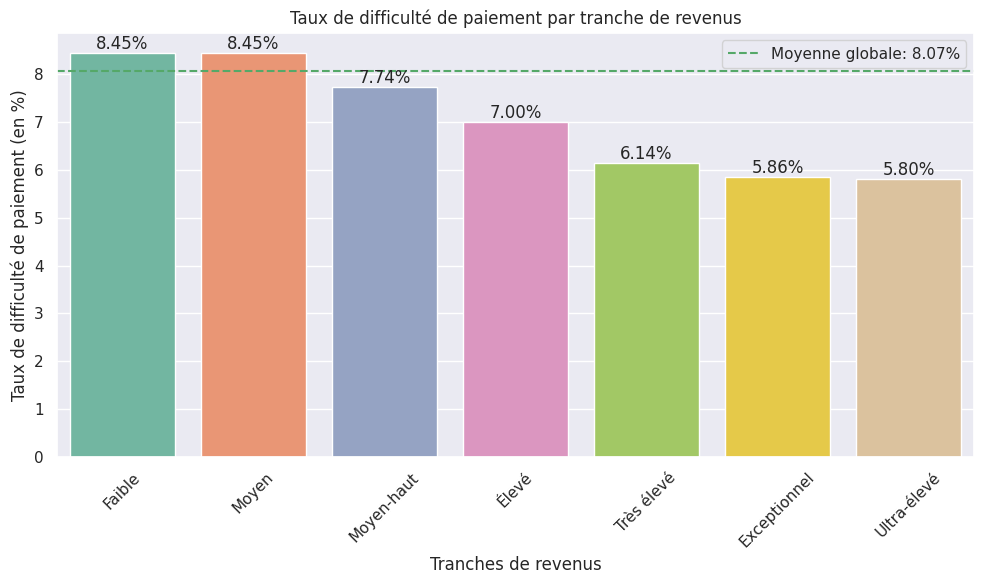

In [44]:
def visualize_target_rate_by_income_cat(df):
    # df['AMT_INCOME_GROUP'] = pd.cut(df['AMT_INCOME_TOTAL'], bins=bins, labels=labels, right=True)

    # Calculate the default rate for each income decile
    target_rates = df.groupby('AMT_INCOME_GROUP', observed=True)['TARGET'].mean() * 100

    # Calculate overall mean Taux de difficulté de paiement
    overall_mean = df['TARGET'].mean() * 100

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=target_rates.index, y=target_rates.values, hue=target_rates.index, palette="Set2")

    # Add text annotations above each bar
    for i, v in enumerate(target_rates.values):
        ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

    # Add horizontal line for overall mean
    plt.axhline(y=overall_mean, color='g', linestyle='--', label=f'Moyenne globale: {overall_mean:.2f}%')

    plt.xlabel('Tranches de revenus')
    plt.ylabel('Taux de difficulté de paiement (en %)')
    plt.title('Taux de difficulté de paiement par tranche de revenus')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

visualize_target_rate_by_income_cat(application_train_temp)

**Interprétation** :
- Plus le revenu augmente, plus le risque est faible.

> **Feature engineering recommandé** :
- Créer une variable "tranche de revenus" (`AMT_INCOME_GROUP`) à la place de `AMT_INCOME_TOTAL`.
- *Avantage : traite les outliers.*

#### Taux de difficulté de paiement par catégorie de revenu

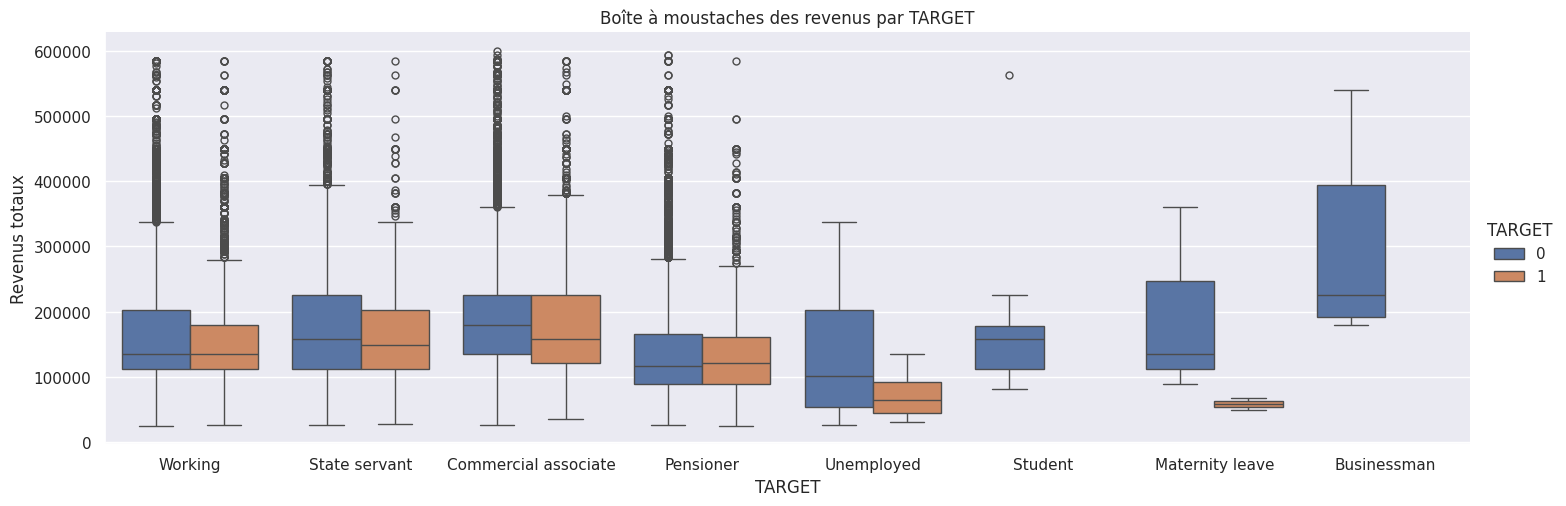

In [45]:
# Boite a moustache de distribution des revenu par TARGET
sns.catplot(data=application_train_income_capped, y='AMT_INCOME_TOTAL',  x='NAME_INCOME_TYPE', hue="TARGET", kind="box", aspect=3)
plt.title('Boîte à moustaches des revenus par TARGET')
plt.ylabel('Revenus totaux')
plt.xlabel('TARGET')
plt.show()

In [46]:
target_rate_by_income_type = target_rate_by_cat(application_train_temp, 'NAME_INCOME_TYPE')
print(target_rate_by_income_type)

                      target_0  target_1  total_count  target_rate
NAME_INCOME_TYPE                                                  
Working                 143550     15224       158774         9.59
Commercial associate     66257      5360        71617         7.48
Pensioner                52380      2982        55362         5.39
State servant            20454      1249        21703         5.75
Unemployed                  14         8           22        36.36
Student                     18         0           18         0.00
Businessman                 10         0           10         0.00
Maternity leave              3         2            5        40.00


In [47]:
def combine_low_count_categories(
    df: pd.DataFrame,
    column_name: str = 'NAME_INCOME_TYPE',
    threshold: int = 100,
    new_category_name: str = "Other"
    ):
    """Combines categories with a low number of individuals into a special category.

    Args:
        df: The pandas DataFrame.
        column_name: The name of the column containing the categories.
        threshold: The minimum number of individuals in a category to keep it separate.
        new_category_name: The name of the new category for combined low-count categories.

    Returns:
        A new DataFrame with combined categories.
    """

    value_counts = df[column_name].value_counts()
    low_count_categories = value_counts[value_counts < threshold].index
    df[column_name] = df[column_name].replace(low_count_categories, new_category_name)
    return df

In [48]:
# Example usage (assuming 'application_train_temp' is your DataFrame and 'NAME_INCOME_TYPE' is the column):
application_train_temp = combine_low_count_categories(application_train_temp)

In [49]:
target_rate_by_income_type = target_rate_by_cat(application_train_temp, 'NAME_INCOME_TYPE')
print(target_rate_by_income_type)

                      target_0  target_1  total_count  target_rate
NAME_INCOME_TYPE                                                  
Working                 143550     15224       158774         9.59
Commercial associate     66257      5360        71617         7.48
Pensioner                52380      2982        55362         5.39
State servant            20454      1249        21703         5.75
Other                       45        10           55        18.18


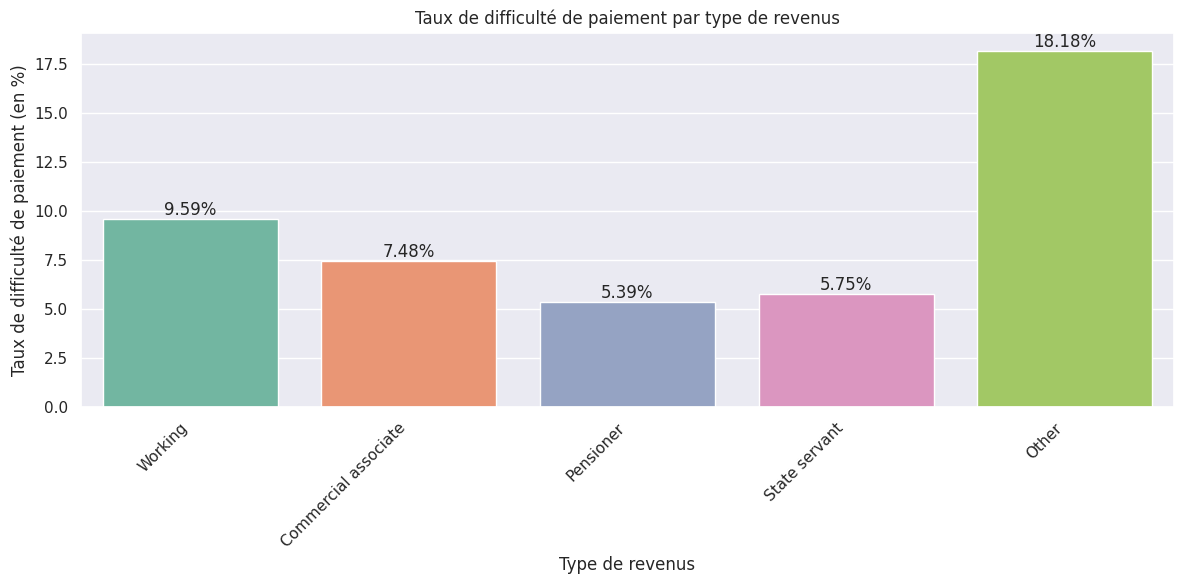

In [50]:
min_count = 10  # Adjust this threshold as needed
filtered_df = target_rate_by_income_type[target_rate_by_income_type['total_count'] >= min_count]

plt.figure(figsize=(12, 6))

# Create bar plot
ax = sns.barplot(x=filtered_df.index, y=filtered_df['target_rate'], palette="Set2", hue=filtered_df.index)

# Add text annotations above each bar
for i, v in enumerate(filtered_df['target_rate']):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.xlabel('Type de revenus')
plt.ylabel('Taux de difficulté de paiement (en %)')
plt.title('Taux de difficulté de paiement par type de revenus')
plt.xticks(rotation=45, ha='right')
# plt.legend()
plt.tight_layout()
plt.show()

**Interprétation** :

- Le type de revenu a un impact sur le taux/risque de difficulté de paiement.

**Feature engineering recommandé** :
- Transformer `NAME_INCOME_TYPE` : Combiner les types de revenus à faible nombre dans "Other".

### Taux de difficulté de paiement par enfants

In [51]:
target_rate_by_children = target_rate_by_cat(application_train_temp, 'CNT_CHILDREN')
print(target_rate_by_children)

              target_0  target_1  total_count  target_rate
CNT_CHILDREN                                              
0               198762     16609       215371         7.71
1                55665      5454        61119         8.92
2                24416      2333        26749         8.72
3                 3359       358         3717         9.63
4                  374        55          429        12.82
5                   77         7           84         8.33
6                   15         6           21        28.57
7                    7         0            7         0.00
14                   3         0            3         0.00
9                    0         2            2       100.00
8                    2         0            2         0.00
10                   2         0            2         0.00
12                   2         0            2         0.00
19                   2         0            2         0.00
11                   0         1            1       100.

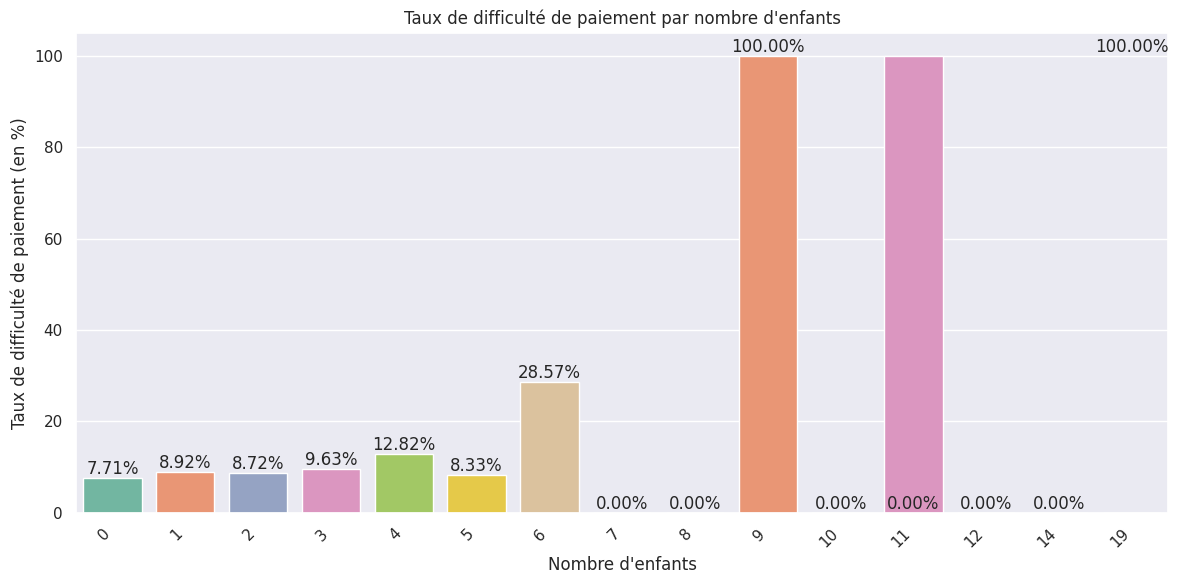

In [52]:
filtered_df = target_rate_by_children.copy()
plt.figure(figsize=(12, 6))

# Create bar plot
ax = sns.barplot(x=filtered_df.index, y=filtered_df['target_rate'], palette="Set2", hue=filtered_df.index, legend=False)

# Add text annotations above each bar
for i, v in enumerate(filtered_df['target_rate']):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.xlabel("Nombre d'enfants")
plt.ylabel('Taux de difficulté de paiement (en %)')
plt.title("Taux de difficulté de paiement par nombre d'enfants")
plt.xticks(rotation=45, ha='right')
# plt.legend()
plt.tight_layout()

plt.show()

In [53]:
def count_children_four_plus(df):
  df.loc[df['CNT_CHILDREN'] >= 4, 'CNT_CHILDREN'] = 4
  return df

In [54]:
application_train_temp = count_children_four_plus(application_train_temp)

In [55]:
target_rate_by_children = target_rate_by_cat(application_train_temp, 'CNT_CHILDREN')
print(target_rate_by_children)

              target_0  target_1  total_count  target_rate
CNT_CHILDREN                                              
0               198762     16609       215371         7.71
1                55665      5454        61119         8.92
2                24416      2333        26749         8.72
3                 3359       358         3717         9.63
4                  484        71          555        12.79


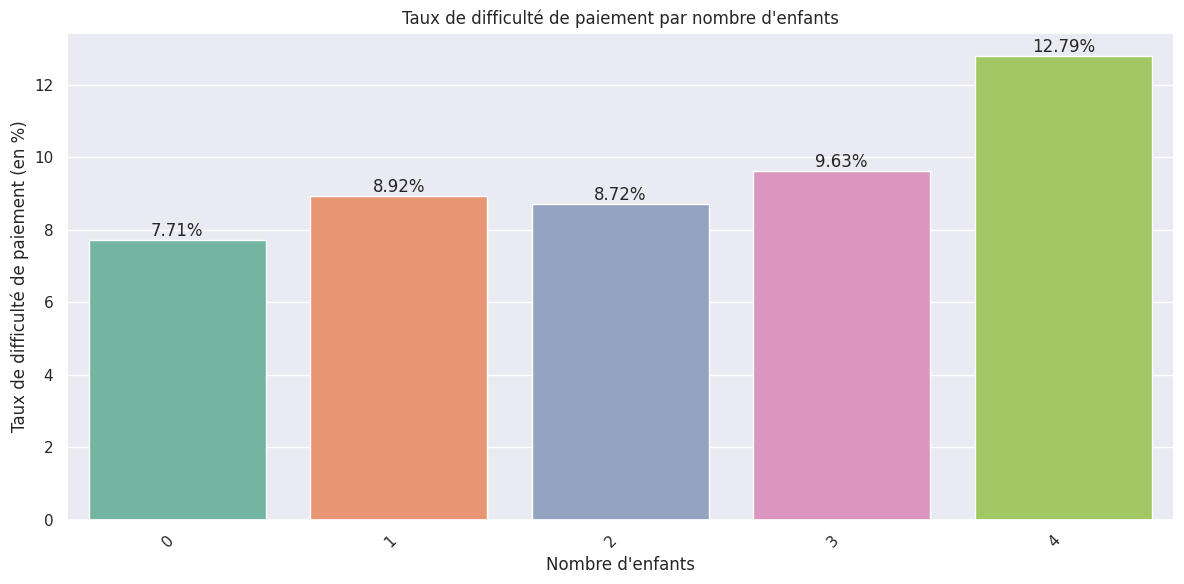

In [56]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=target_rate_by_children.index, y=target_rate_by_children['target_rate'], palette="Set2", hue=target_rate_by_children.index, legend=False)
# Add text annotations above each bar
for i, v in enumerate(target_rate_by_children['target_rate']):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
plt.xlabel("Nombre d'enfants")
plt.ylabel('Taux de difficulté de paiement (en %)')
plt.title("Taux de difficulté de paiement par nombre d'enfants")
plt.xticks(rotation=45, ha='right')
# plt.legend()
plt.tight_layout()
plt.show()

**Interprétation** :

> **Feature engineering recommandé** :
- Créer une modalité qui regroupe "4 enfants et plus" (`4`) pour `CNT_CHILDREN`.

### Taux de difficultés de paiement par tranches d'âge

L'age minimum pour un crédit est de 21 ans (aux Etats-unis).

- Création des tranches d'age à partir de `DAYS_BIRTH`
- Afficher le taux de difficultés de paiement par tranches d'âge

In [57]:
def create_age_groups(df: pd.DataFrame) -> pd.DataFrame:
  """
  Créer des tranches d'age pour la colonne `DAYS_BIRTH`.

  Parameters:
  - df: DataFrame
  - source_col: Source column name
  - new_cat_col: New categorical column name
  """
  if 'DAYS_BIRTH' in df.columns:
    df['YEARS_BIRTH'] = round((df['DAYS_BIRTH'] / -365), 2)
    bins = [21, 25, 35, 45, 55, 65, float('inf')]
    labels = ['21-24', '25-34', '35-44', '45-54', '55-64', '65+']
    df['AGE_GROUP'] = pd.cut(df['YEARS_BIRTH'], bins=bins, labels=labels, right=True)
    # Suppression de `DAYS_BIRTH`
    df.drop(columns=['DAYS_BIRTH'], inplace=True)
  return df

In [58]:
application_train_temp = create_age_groups(application_train_temp)

In [59]:
target_rate_by_age = target_rate_by_cat(application_train_temp, 'AGE_GROUP').sort_values(by='AGE_GROUP', ascending=True)
print(target_rate_by_age)

           target_0  target_1  total_count  target_rate
AGE_GROUP                                              
21-24         10677      1497        12174        12.30
25-34         64603      7718        72321        10.67
35-44         77174      7083        84257         8.41
45-54         65138      4944        70082         7.05
55-64         57308      3282        60590         5.42
65+            7785       301         8086         3.72


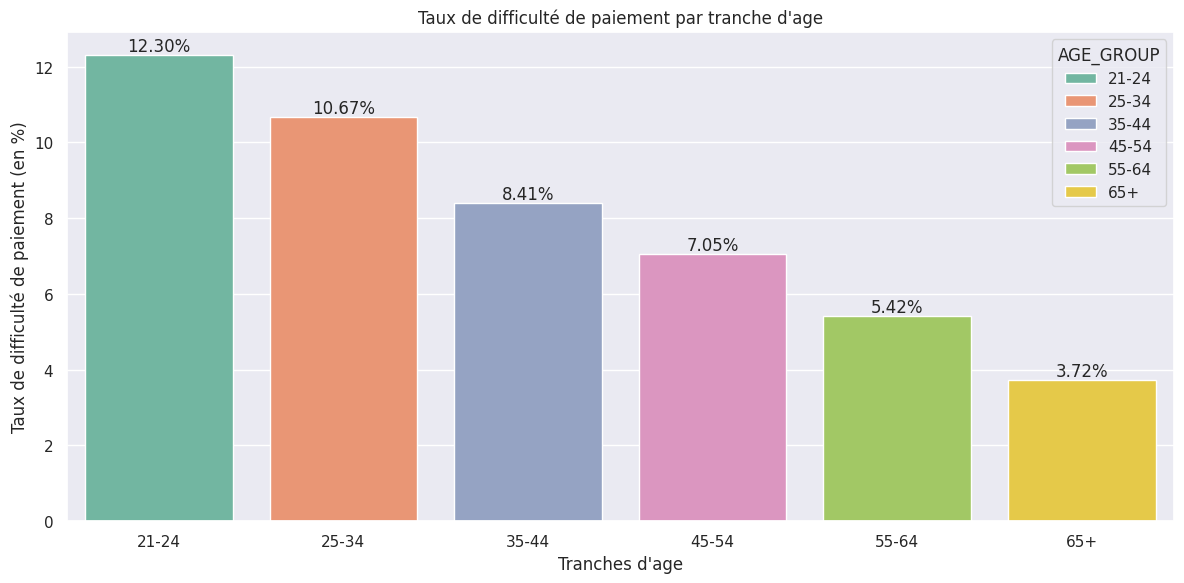

In [60]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=target_rate_by_age.index, y=target_rate_by_age['target_rate'], palette="Set2", hue=target_rate_by_age.index, legend=True)
# Add text annotations above each bar
for i, v in enumerate(target_rate_by_age['target_rate']):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
plt.xlabel("Tranches d'age")
plt.ylabel('Taux de difficulté de paiement (en %)')
plt.title("Taux de difficulté de paiement par tranche d'age")
# plt.legend()
plt.tight_layout()
plt.show()

**Interprétation** :
- L'age est un facteur de risque de difficulté de paiement clairement identifié. Plus le client est jeune, et plus le **risque de difficulté de paiement est élevé**.

> **Feature engineering recommandé** :
- Créer des tranches d'age `AGE_GROUP` à la place de `DAYS_BIRTH`

### Taux de difficultés de paiement par durée d'emploi

- `DAYS_EMPLOYED`

In [61]:
application_train_temp.shape

(307511, 123)

In [62]:
def create_employed_duration_groups(df):
  """
  Créer des tranches de durée d'emploi pour la colonne `DAYS_EMPLOYED`.

  Parameters:
  - df: DataFrame
  - source_col: Source column name
  - new_cat_col: New categorical column name
  """
  if 'DAYS_EMPLOYED' in df.columns:
    # Transformation de jours (négatifs) en années
    df['YEARS_EMPLOYED'] = round((df['DAYS_EMPLOYED'] / -365), 2)
    bins = [0, 1, 3, 5, 7, 10, 15, 20, float('inf')]
    labels = ['Less than 1 year', '1-3 years', '3-5 years', '5-7 years', '7-10 years', '10-15 years', '15-20 years', '20+ years']
    df['EMPLOYED_DURATION_GROUP'] = pd.cut(df['YEARS_EMPLOYED'], bins=bins, labels=labels, right=False)
    df.drop(columns=['DAYS_EMPLOYED'], inplace=True)
    return df

In [63]:
application_train_temp = create_employed_duration_groups(application_train_temp)

In [64]:
target_rate_by_employed_duration = target_rate_by_cat(application_train_temp, 'EMPLOYED_DURATION_GROUP').sort_values(by='EMPLOYED_DURATION_GROUP', ascending=True)
print(target_rate_by_employed_duration)

                         target_0  target_1  total_count  target_rate
EMPLOYED_DURATION_GROUP                                              
Less than 1 year            24791      3061        27852        10.99
1-3 years                   54676      6805        61481        11.07
3-5 years                   42343      4534        46877         9.67
5-7 years                   28849      2481        31330         7.92
7-10 years                  31280      2308        33588         6.87
10-15 years                 25990      1594        27584         5.78
15-20 years                 10335       526        10861         4.84
20+ years                   12038       526        12564         4.19


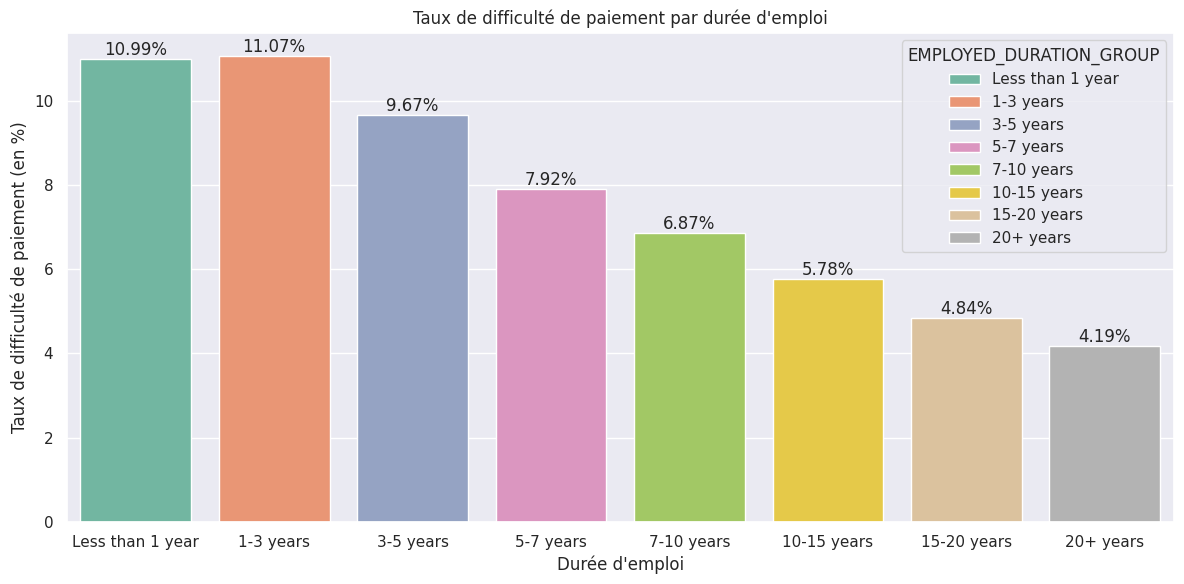

In [65]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=target_rate_by_employed_duration.index, y=target_rate_by_employed_duration['target_rate'], palette="Set2", hue=target_rate_by_employed_duration.index, legend=True)
# Add text annotations above each bar
for i, v in enumerate(target_rate_by_employed_duration['target_rate']):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
plt.xlabel("Durée d'emploi")
plt.ylabel('Taux de difficulté de paiement (en %)')
plt.title("Taux de difficulté de paiement par durée d'emploi")
# plt.legend()
plt.tight_layout()
plt.show()

*Interprétation** :
- Plus le client est agé, moins le risque de difficulté de paiement est élevé.
- La durée en emploi a un impact significatif sur le taux/risque de difficulté de paiement.

> **Feature engineering recommandé** :

- Créer des tranche de durée d'emploi `EMPLOYED_DURATION_GROUP` à la place de `DAYS_EMPLOYED`

### Taux de difficulté de paiement par type de poste et entreprise

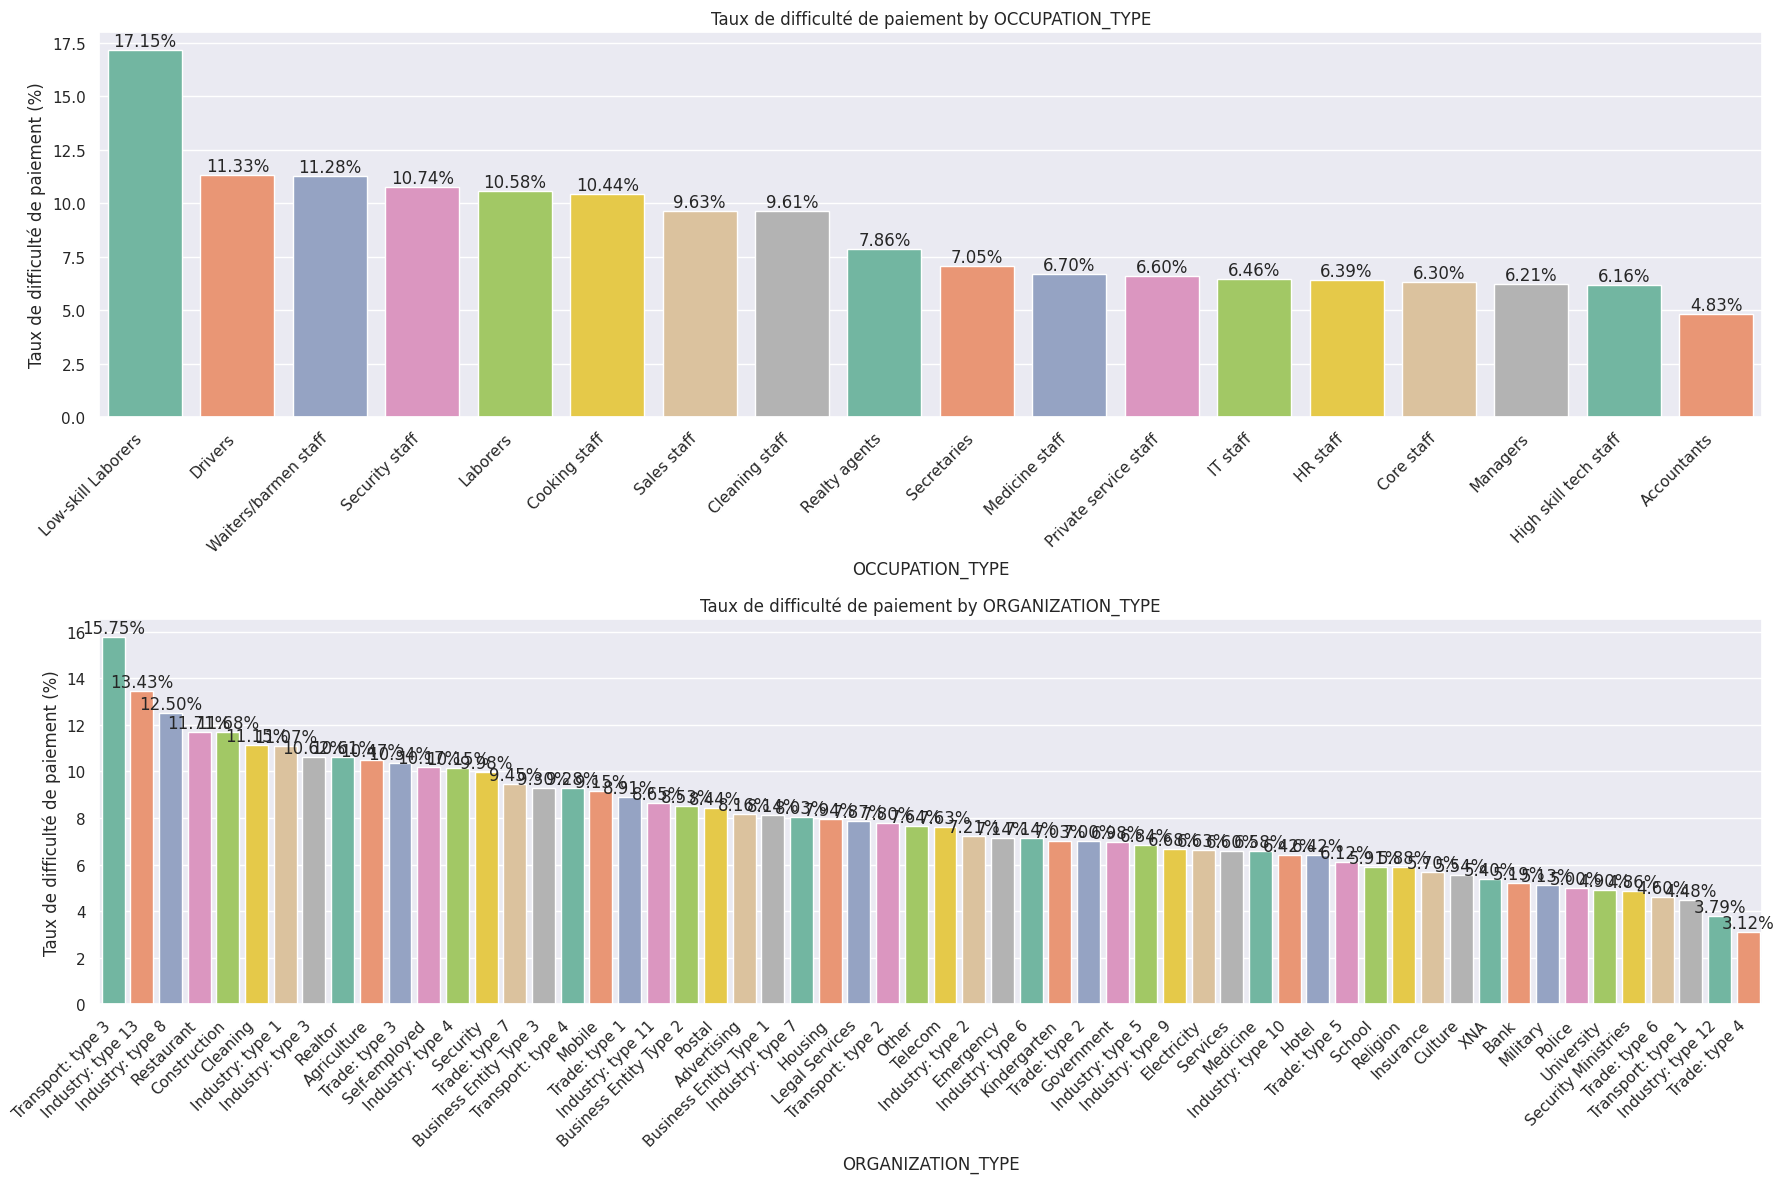

In [66]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols_type = [
    'OCCUPATION_TYPE',
    'ORGANIZATION_TYPE',
]

target_rates_for_type_cats = []

for cat_col in cat_cols_type:
  targte_rate_df = target_rate_by_cat(application_train_temp, cat_col).sort_values(by='target_rate', ascending=False)
  target_rates_for_type_cats.append(targte_rate_df)

# Calculate the number of rows needed for a single column
num_cols = 1
num_rows = len(target_rates_for_type_cats)

# Adjust figure size for a single column
plt.figure(figsize=(18, 6 * num_rows))

for i, df in enumerate(target_rates_for_type_cats):
    plt.subplot(num_rows, num_cols, i + 1)  # num_rows, num column, index starting from 1

    # Filter out categories with low counts (adjust threshold as needed)
    min_count = 10
    filtered_df = df[df['total_count'] >= min_count]

    ax = sns.barplot(x=filtered_df.index, y=filtered_df['target_rate'], palette="Set2", hue=filtered_df.index, legend=False)

    for j, v in enumerate(filtered_df['target_rate']):
        ax.text(j, v, f'{v:.2f}%', ha='center', va='bottom')

    plt.xlabel(df.index.name)
    plt.ylabel('Taux de difficulté de paiement (%)')
    plt.title(f'Taux de difficulté de paiement by {df.index.name}')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()

plt.show()

**Interprétation**

- Ces variables ont eu une corrélation significative avec la cible `TARGET` (diffuclté de paiement).
- Elle sont donc intéressantes pour développer notre modèle de machine learning.

### Taux de difficulté de paiement par catégories binaire (Y/N)

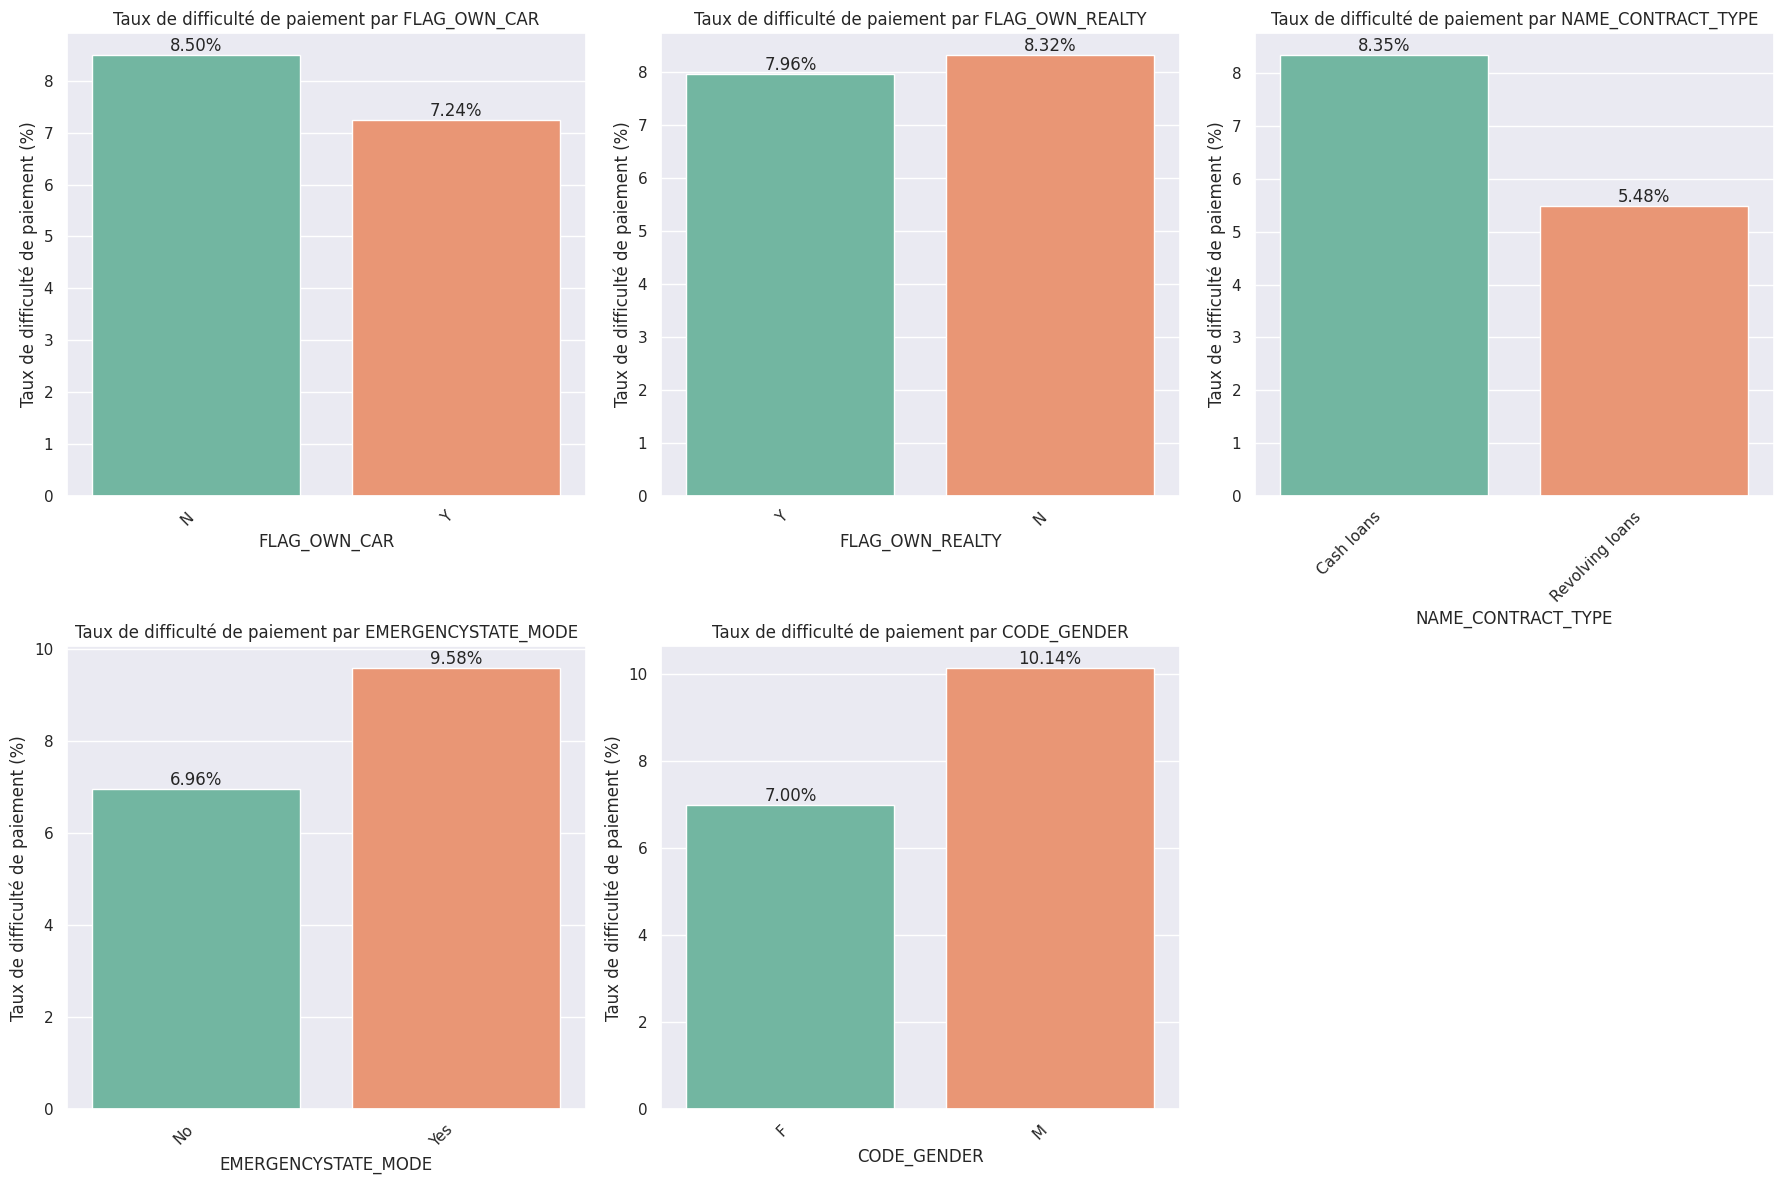

In [67]:
import math

cat_cols_binary = [
  'FLAG_OWN_CAR',
  'FLAG_OWN_REALTY',
  'NAME_CONTRACT_TYPE',
  'EMERGENCYSTATE_MODE',
  'CODE_GENDER'
]

target_rates_for_binary_cats = []

for cat_col in cat_cols_binary:
  target_rate_by_cat(application_train_temp, cat_col)
  target_rates_for_binary_cats.append(target_rate_by_cat(application_train_temp, cat_col))

# Calculate the number of rows needed for the grid
num_cols = 3
num_rows = math.ceil(len(target_rates_for_binary_cats) / num_cols)

plt.figure(figsize=(18, num_cols * num_rows * 2))  # Adjust figure size as needed

for i, df in enumerate(target_rates_for_binary_cats):
    plt.subplot(num_rows, num_cols, i + 1)  # num_rows, num columns, and index starting from 1

    # Filter out categories with low counts (adjust threshold as needed)
    min_count = 10
    filtered_df = df[df['total_count'] >= min_count]

    ax = sns.barplot(x=filtered_df.index, y=filtered_df['target_rate'], palette="Set2", hue=filtered_df.index, legend=False)

    for j, v in enumerate(filtered_df['target_rate']):
        ax.text(j, v, f'{v:.2f}%', ha='center', va='bottom')

    plt.xlabel(df.index.name)
    plt.ylabel('Taux de difficulté de paiement (%)')
    plt.title(f'Taux de difficulté de paiement par {df.index.name}')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()

plt.show()

**Interprétation**

### Taux de difficulté de paiement par autres catégories

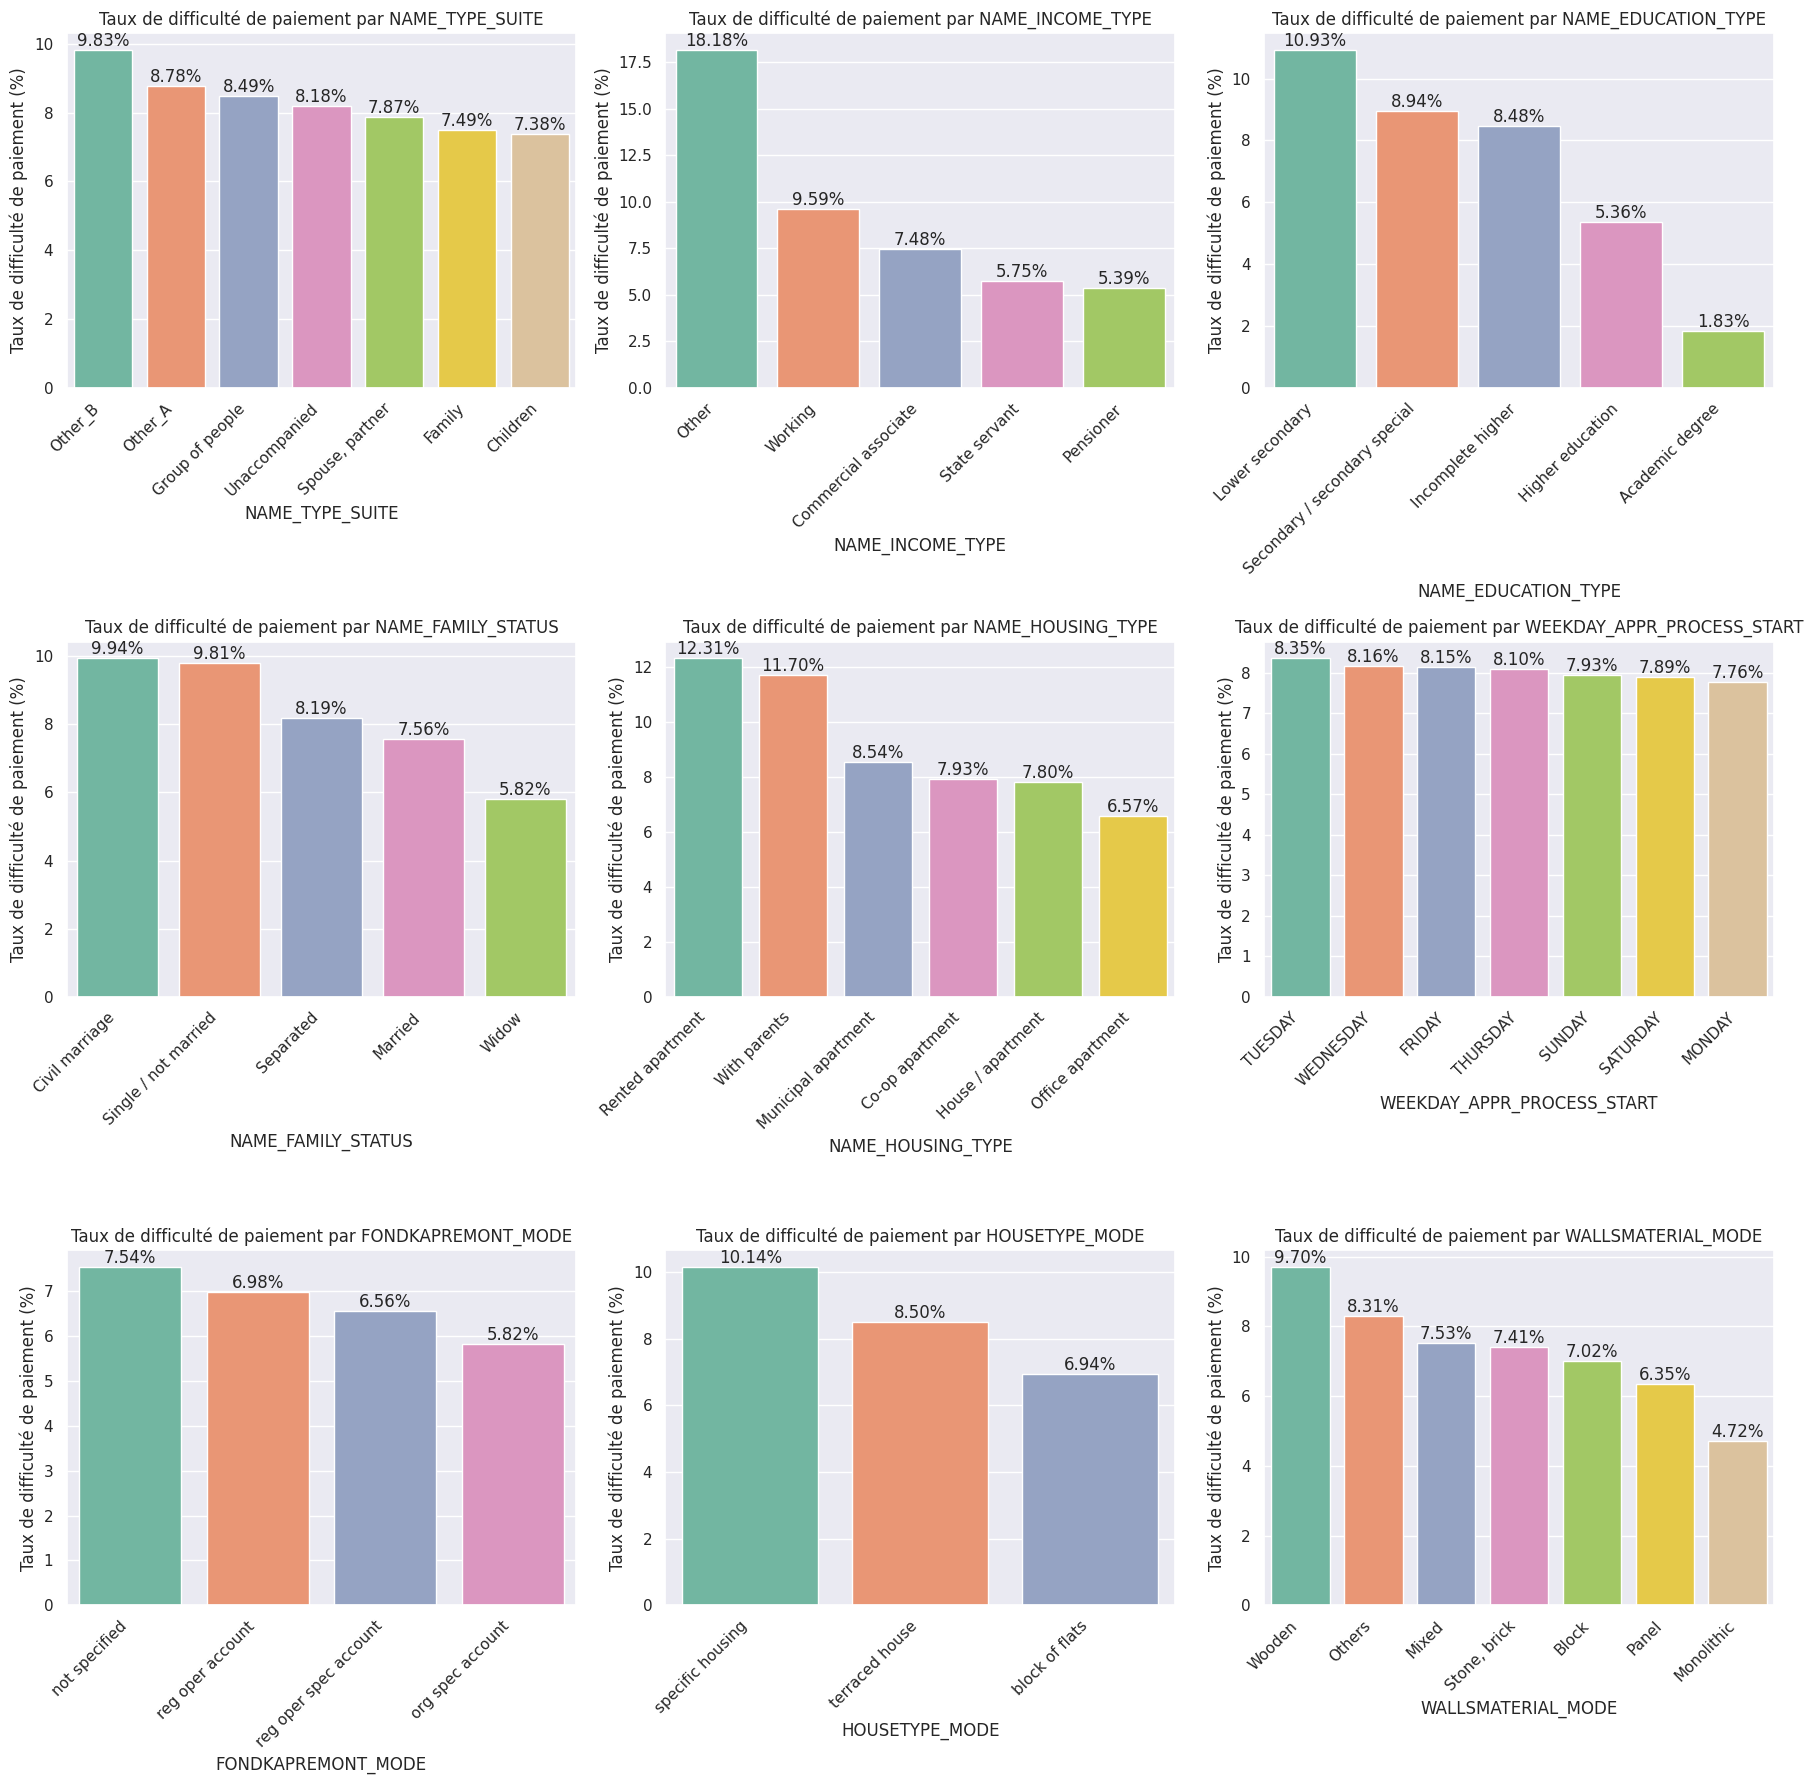

In [68]:
cat_cols_other = [
  'NAME_TYPE_SUITE',
  'NAME_INCOME_TYPE',
  'NAME_EDUCATION_TYPE',
  'NAME_FAMILY_STATUS',
  'NAME_HOUSING_TYPE',
  'WEEKDAY_APPR_PROCESS_START',
  'FONDKAPREMONT_MODE',
  'HOUSETYPE_MODE',
  'WALLSMATERIAL_MODE'
]

target_rates_for_other_cats = []

for cat_col in cat_cols_other:
  # Check if the column exists in the DataFrame before proceeding
  if cat_col in application_train_temp.columns:
    targte_rate_df = target_rate_by_cat(application_train_temp, cat_col).sort_values(by='target_rate', ascending=False)
    target_rates_for_other_cats.append(targte_rate_df) # Append the result to the list
  else:
    print(f"Warning: Column '{cat_col}' not found in the DataFrame. Skipping...")


# Calculate the number of rows needed for the grid
num_cols = 3
num_rows = math.ceil(len(target_rates_for_other_cats) / num_cols)

plt.figure(figsize=(18, num_cols * num_rows * 2))  # Adjust figure size as needed

for i, df in enumerate(target_rates_for_other_cats):
    plt.subplot(num_rows, num_cols, i + 1)  # num_rows, num columns, and index starting from 1

    # Filter out categories with low counts (adjust threshold as needed)
    min_count = 10
    filtered_df = df[df['total_count'] >= min_count]

    ax = sns.barplot(x=filtered_df.index, y=filtered_df['target_rate'], palette="Set2", hue=filtered_df.index, legend=False)

    for j, v in enumerate(filtered_df['target_rate']):
        ax.text(j, v, f'{v:.2f}%', ha='center', va='bottom')

    plt.xlabel(df.index.name)
    plt.ylabel('Taux de difficulté de paiement (%)')
    plt.title(f'Taux de difficulté de paiement par {df.index.name}')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()

plt.show()

**Feature engineering recommandé** :
- Suppression de la variable `WEEKDAY_APPR_PROCESS_START`

### Taux de difficulté de paiement par tranches horaires

In [69]:
def create_hour_groups(df):
  """
  Crée des tranches horaires pour la colonne spécifiée dans le DataFrame.

  Args:
      df: The input DataFrame.
      column_name: The name of the column containing the hour data.

  Returns:
      A new DataFrame with an additional column representing the hour slices.
  """

  if 'HOUR_APPR_PROCESS_START' in df.columns:

    df['HOUR_GROUP'] = pd.cut(df['HOUR_APPR_PROCESS_START'],
                                    bins=[-1, 5, 11, 17, 23],
                                    labels=['Early Morning', 'Morning', 'Afternoon', 'Evening'])
    df.drop(columns=['HOUR_APPR_PROCESS_START'], inplace=True)

  return df


# Example usage (assuming your DataFrame is named 'application_train'):
application_train_temp = create_hour_groups(application_train_temp)

In [70]:
target_rate_by_hour_group = target_rate_by_cat(application_train_temp, 'HOUR_GROUP').sort_values(by='HOUR_GROUP', ascending=True)
print(target_rate_by_hour_group)

               target_0  target_1  total_count  target_rate
HOUR_GROUP                                                 
Early Morning      6681       708         7389         9.58
Morning          121221     11214       132435         8.47
Afternoon        141123     11875       152998         7.76
Evening           13661      1028        14689         7.00


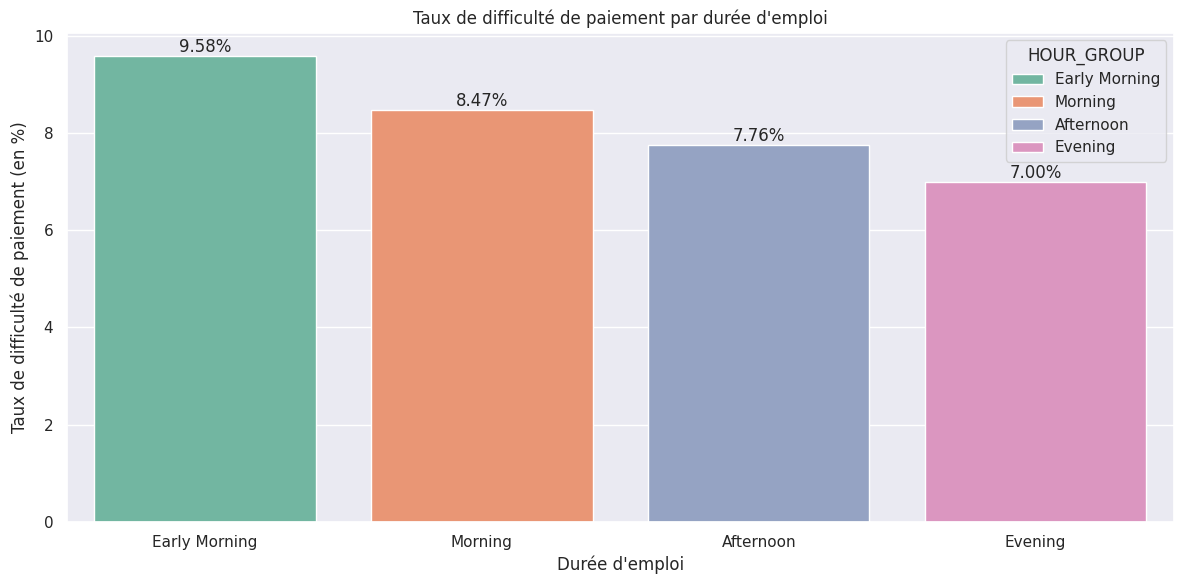

In [71]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=target_rate_by_hour_group.index, y=target_rate_by_hour_group['target_rate'], palette="Set2", hue=target_rate_by_hour_group.index, legend=True)
# Add text annotations above each bar
for i, v in enumerate(target_rate_by_hour_group['target_rate']):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
plt.xlabel("Durée d'emploi")
plt.ylabel('Taux de difficulté de paiement (en %)')
plt.title("Taux de difficulté de paiement par durée d'emploi")
# plt.legend()
plt.tight_layout()
plt.show()

**Feature engineerign recommandé** :
- **Regrouper les heures en catégories** significatives telles que :
  - Tôt le matin (0-6)
  - Matin (6-12)
  - Après-midi (12-18)
  - Soir (18-24)

### Taux de difficulté de paiement en fonction du montant du crédit

evolution du taux de diffculté de paiment en fonction de ...

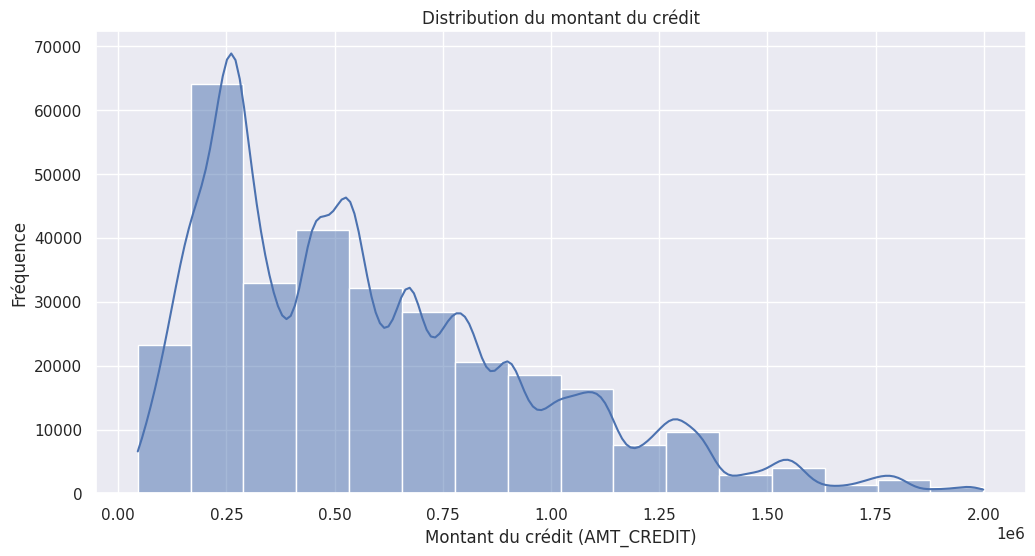

In [72]:
# prompt: Distribution de AMT_CREDIT

df_credit_amt_filtered = application_train_temp[(application_train_temp['AMT_CREDIT'] > 0) & (application_train_temp['AMT_CREDIT'] < 2000000)]

plt.figure(figsize=(12, 6))
sns.histplot(df_credit_amt_filtered['AMT_CREDIT'], bins=16, kde=True)
plt.xlabel('Montant du crédit (AMT_CREDIT)')
plt.ylabel('Fréquence')
plt.title('Distribution du montant du crédit')
plt.show()

In [73]:
def create_credit_amount_groups(df):
  if 'AMT_CREDIT'  in df.columns:
    bins = [40000, 80000, 120000, 150000, 200000, 350000, 500000, 750000, 1000000, 1500000, float('inf')]
    labels = [
        "40K-80K",
        "80K-120K",
        "120K-150K",
        "150K-200K",
        "200K-350K",
        "350K-500K",
        "500K-750K",
        "750K-1M",
        "1M-1.5M",
        "1.5M+"
    ]

    # Create categorical column
    df['CREDIT_AMT_GROUP'] = pd.cut(df['AMT_CREDIT'], bins=bins, labels=labels, right=False)
    df.drop(columns=['AMT_CREDIT'], inplace=True)
    return df

In [74]:
# Usage
application_train_temp = create_credit_amount_groups(application_train_temp)

In [75]:
target_rate_by_credit_amount = target_rate_by_cat(application_train_temp, 'CREDIT_AMT_GROUP').sort_values(by='CREDIT_AMT_GROUP', ascending=True)
print(target_rate_by_credit_amount)

                  target_0  target_1  total_count  target_rate
CREDIT_AMT_GROUP                                              
40K-80K               3235       162         3397         4.77
80K-120K              6004       404         6408         6.30
120K-150K             7827       527         8354         6.31
150K-200K            16588      1397        17985         7.77
200K-350K            65066      5952        71018         8.38
350K-500K            38008      4163        42171         9.87
500K-750K            58935      6159        65094         9.46
750K-1M              39970      3129        43099         7.26
1M-1.5M              36773      2456        39229         6.26
1.5M+                10280       476        10756         4.43


Ce graphique illustre le taux de difficulté de paiement (en pourcentage) en fonction des différentes tranches de montant de crédit.

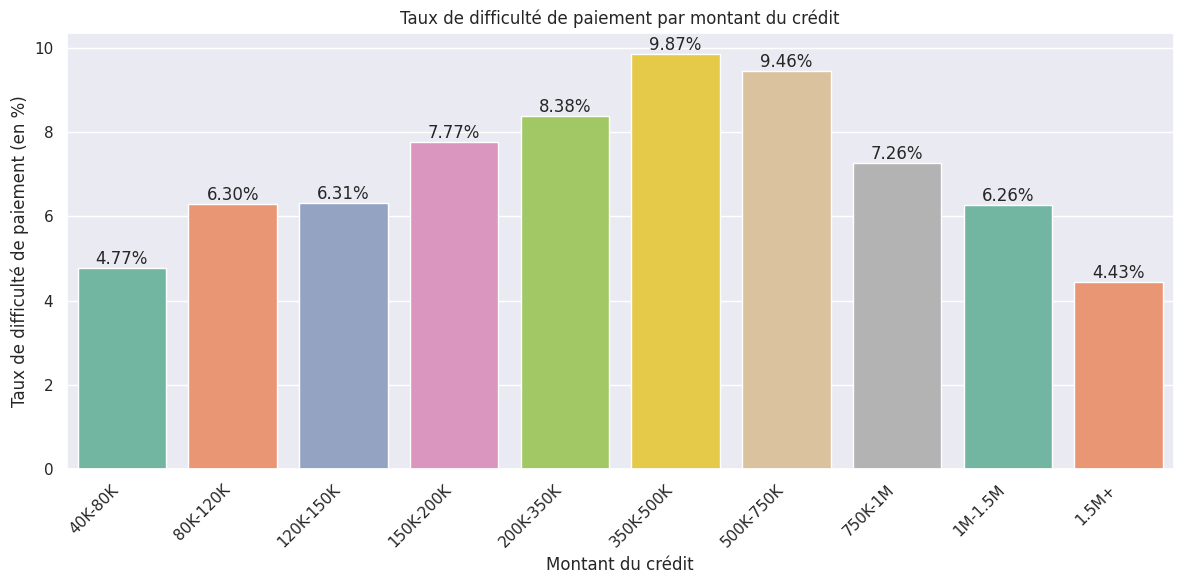

In [76]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=target_rate_by_credit_amount.index, y=target_rate_by_credit_amount['target_rate'], palette="Set2", hue=target_rate_by_credit_amount.index, legend=False)
# Add text annotations above each bar
for i, v in enumerate(target_rate_by_credit_amount['target_rate']):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
plt.xlabel("Montant du crédit")
plt.ylabel('Taux de difficulté de paiement (en %)')
plt.title("Taux de difficulté de paiement par montant du crédit")
plt.xticks(rotation=45, ha='right')
# plt.legend()
plt.tight_layout()
plt.show()

**Interprétation** :

- **Taux de difficulté maximal** : Les crédits dans la tranche **350K–500K** affichent le taux de difficulté le plus élevé (9.87%), suivis de près par la tranche **200K–350K** (8.38%) et **500K–750K** (9.46%). Cela peut indiquer une zone de risque pour les montants moyens à élevés.

- **Taux de difficulté faible** : Les tranches **40K–80K** (4.77%) et **1.5M+** (4.43%) ont les taux les plus bas, suggérant que les petits crédits ou les très gros crédits sont mieux remboursés.

- **Tendance générale** : Une forme en cloche semble émerger : les taux augmentent pour des montants modérés, puis diminuent pour les très gros montants.

**Feature Engineering recommandé** :
- Créer des tranches de montant du crédit `CREDIT_AMT_GROUP` à la place de `AMT_CREDIT`.

### Matrices de correlation

#### Matrice de correlation pour les variables quantitatives (non normalisées)

In [77]:
def create_correlation_matrix(df: pd.DataFrame, target_column: str, cols: list, title, annot:bool = True):
    """
    Creates and visualizes a correlation matrix, focusing on normalized columns and the target.

    Args:
        df: The pandas DataFrame.
        target_column: The name of the target variable column.
        cols: A list of column names that have been normalized.
    """

    # Select the normalized columns and the target column
    cols_for_matrix = cols + [target_column]

    # Ensure all columns are present in the DataFrame
    cols_to_keep = [col for col in cols_for_matrix if col in df.columns]

    if not cols_to_keep:
        print("Warning: None of the specified columns were found in the DataFrame.")
        return

    # Calculate the correlation matrix
    correlation_matrix = df[cols_to_keep].corr()

    # Create a heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=annot, cmap='coolwarm', fmt=".2f")
    plt.title(title)
    plt.show()


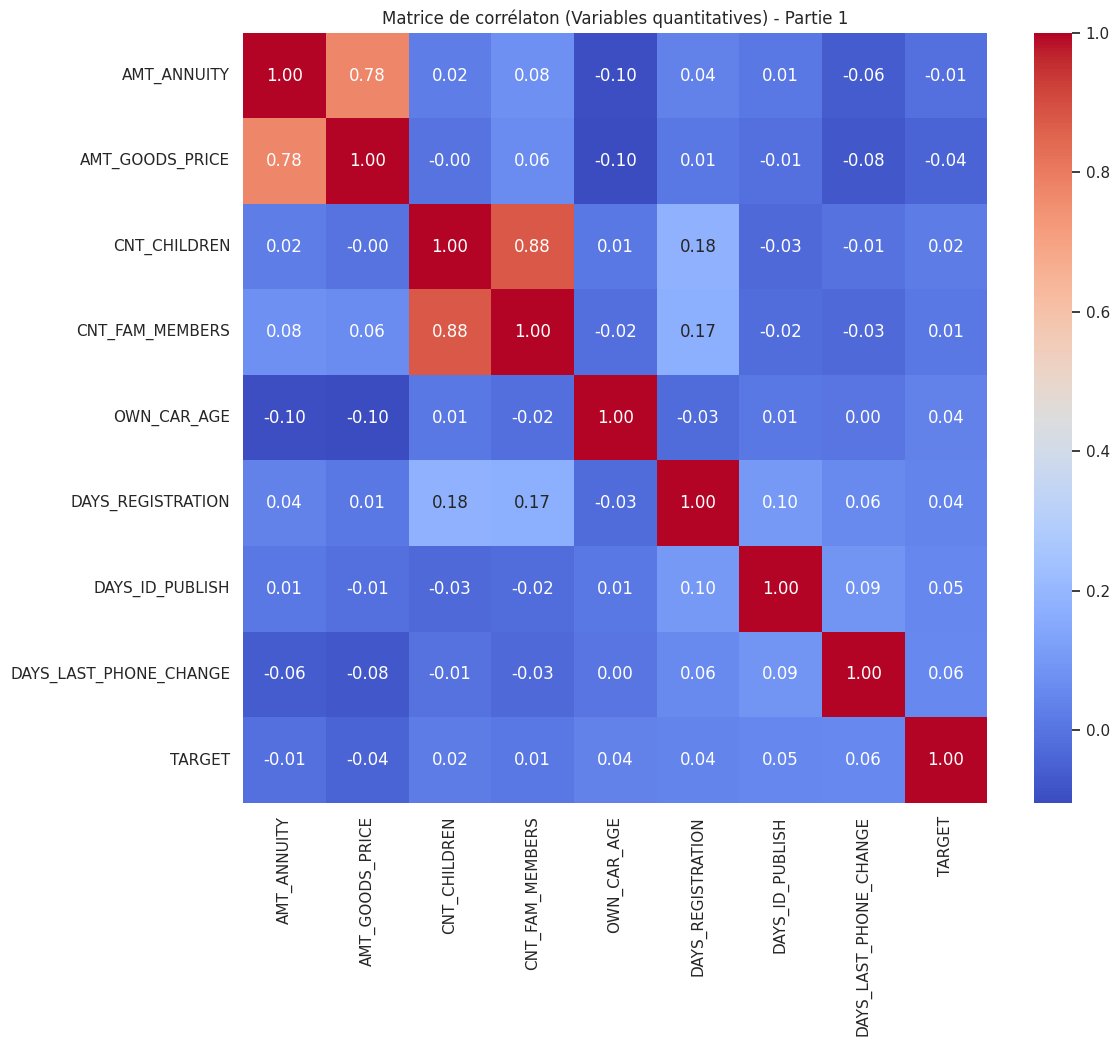

In [78]:
quantity_cols_for_matrix_1 =[
  'AMT_CREDIT',
  'AMT_ANNUITY',
  'AMT_INCOME_TOTAL',
  'RATIO_ANNUITY_INCOME',
  'RATIO_CREDIT_INCOME',
  'AMT_GOODS_PRICE',
  'CNT_CHILDREN',
  'CNT_FAM_MEMBERS',
  'OWN_CAR_AGE',
  'DAYS_BIRTH',
  'DAYS_REGISTRATION',
  'DAYS_ID_PUBLISH',
  'DAYS_EMPLOYED',
  'DAYS_LAST_PHONE_CHANGE'
]

create_correlation_matrix(application_train_temp, 'TARGET', quantity_cols_for_matrix_1, 'Matrice de corrélaton (Variables quantitatives) - Partie 1')

**Observations générales**
1. **Corrélations élevées entre certaines variables** :  
   - `AMT_CREDIT`, `AMT_ANNUITY` et `AMT_GOODS_PRICE` ont des corrélations très élevées (proches de 1).  
     ➡ Cela indique qu'elles sont fortement liées : par exemple, un crédit élevé est souvent associé à des mensualités élevées (`AMT_ANNUITY`) et à des biens de plus grande valeur (`AMT_GOODS_PRICE`).
   - `CNT_CHILDREN` et `CNT_FAM_MEMBERS` sont également très corrélés (0.88).  
     ➡ Cela est logique, car le nombre de membres de la famille est souvent directement lié au nombre d'enfants.

2. **Variables peu corrélées à la cible (`TARGET`)** :  
   - Les corrélations entre la variable cible (`TARGET`) et les autres variables sont globalement faibles (autour de ±0.1 ou moins).  
     ➡ Cela indique que, individuellement, aucune variable ne détermine fortement le risque de défaut.

**Points spécifiques***
1. **Variables ayant une certaine corrélation avec `TARGET`** :
   - `DAYS_BIRTH` (âge du client) a une corrélation négative modérée avec `TARGET` (-0.08).  
     ➡ Les clients plus âgés semblent légèrement moins susceptibles de faire défaut.
   - `DAYS_EMPLOYED` (durée d'emploi) est également corrélé négativement (-0.07).  
     ➡ Les clients ayant une longue stabilité professionnelle semblent moins risqués.

**Feature engineering recommandé** :
- Supprimer la colonne `AMT_GOODS_PRICE` et `CNT_FAM_MEMBERS` pour éviter des problèmes de colinéarité dans les modèles.

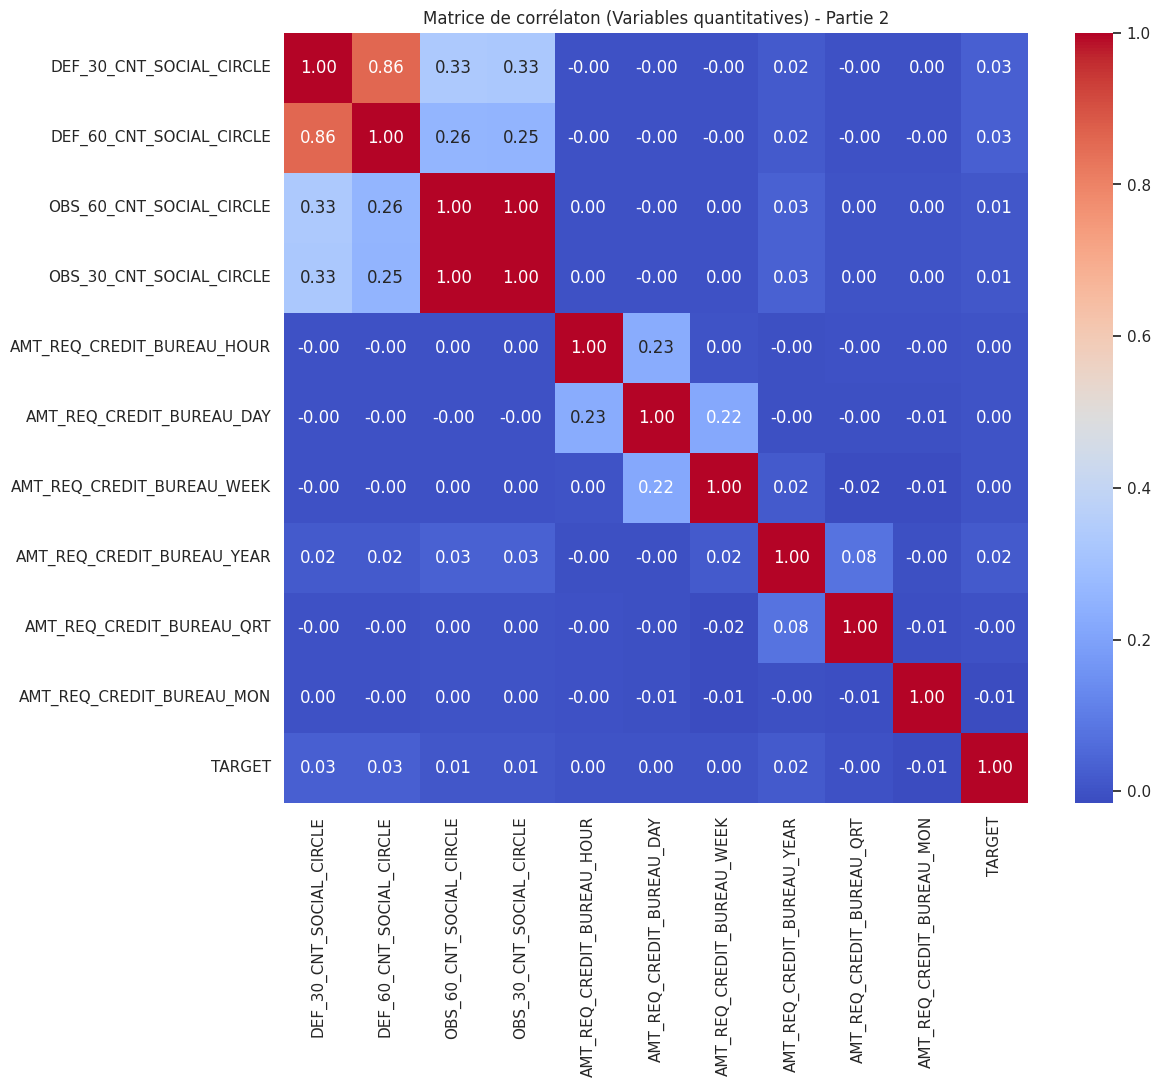

In [79]:
quantity_cols_for_matrix_2 = [
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_MON']

create_correlation_matrix(application_train_temp, 'TARGET', quantity_cols_for_matrix_2, 'Matrice de corrélaton (Variables quantitatives) - Partie 2')

**Feature engineering recommandé** :
- Supprimer la colonne `DEF_60_CNT_SOCIAL_CIRCLE`

#### Matrice de corrélation pour les variables quantitatives normalisées

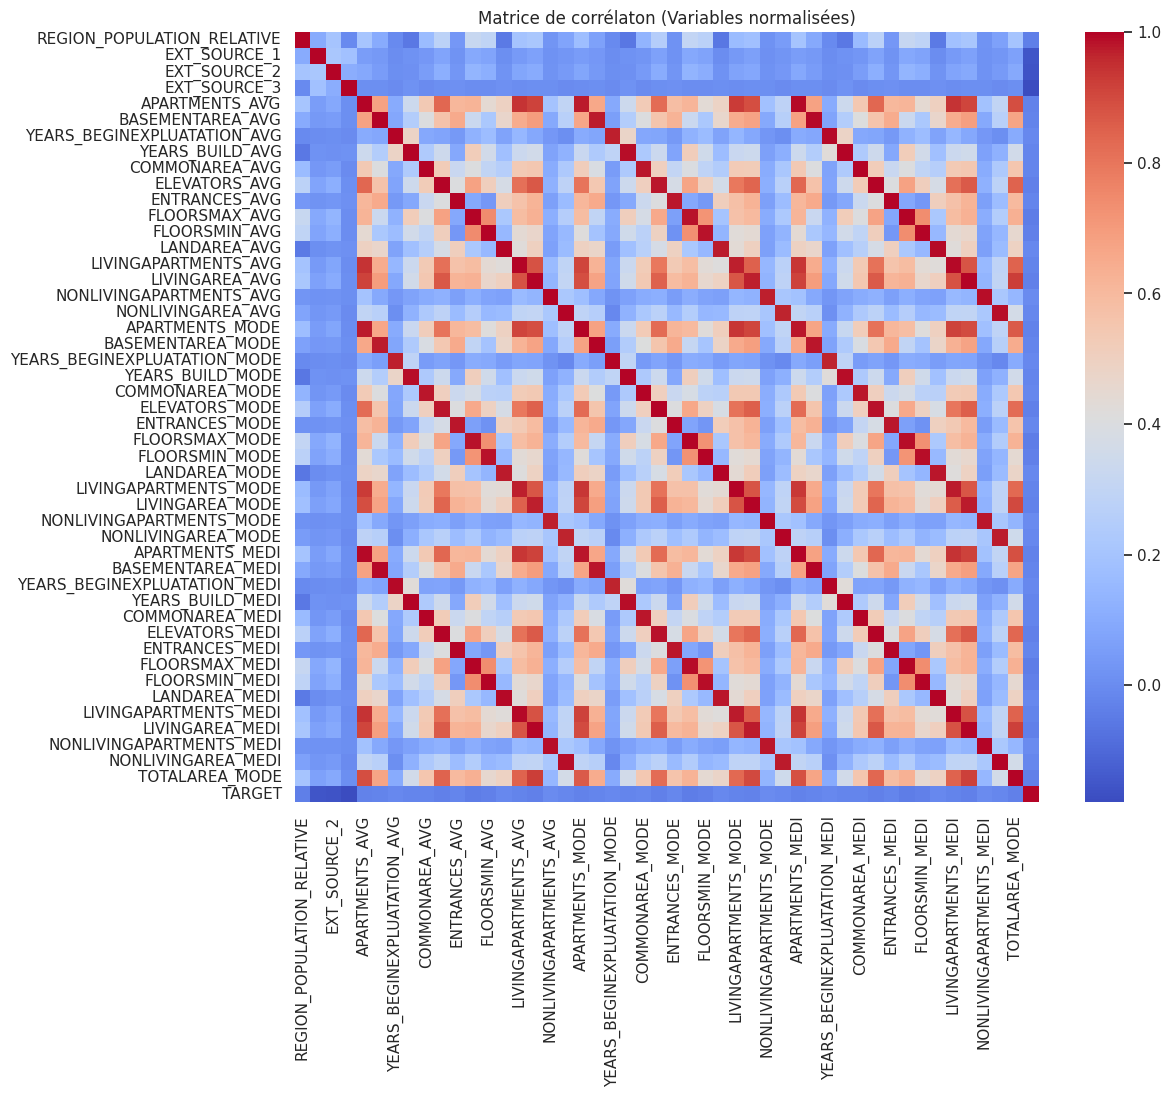

In [80]:
create_correlation_matrix(application_train_temp, 'TARGET', normalized_cols, 'Matrice de corrélaton (Variables normalisées)', False)

**Observation de la matrice :**
- Plusieurs variables présentent des versions multiples : `AVG`, `MODE`, et `MEDI`. Elles sont souvent fortement corrélées entre elles.

**Feature engineering recommandé** :
- Pour réduire la multicolinéarité, nouq conservons les versions `AVG` des variables (plus intuitives) et supprimons les versions `MODE` et `MEDI`. Cela simplifiera aussi le modèle tout en préservant l'information essentielle.

Suppression des colonnes `_MODE` et `_MEDI`

In [81]:
normalized_cols_to_remove = [
    "APARTMENTS_MODE", "APARTMENTS_MEDI",
    "BASEMENTAREA_MODE", "BASEMENTAREA_MEDI",
    "YEARS_BEGINEXPLUATATION_MODE", "YEARS_BEGINEXPLUATATION_MEDI",
    "YEARS_BUILD_MODE", "YEARS_BUILD_MEDI",
    "COMMONAREA_MODE", "COMMONAREA_MEDI",
    "ELEVATORS_MODE", "ELEVATORS_MEDI",
    "ENTRANCES_MODE", "ENTRANCES_MEDI",
    "FLOORSMAX_MODE", "FLOORSMAX_MEDI",
    "FLOORSMIN_MODE", "FLOORSMIN_MEDI",
    "LANDAREA_MODE", "LANDAREA_MEDI",
    "LIVINGAPARTMENTS_MODE", "LIVINGAPARTMENTS_MEDI",
    "LIVINGAREA_MODE", "LIVINGAREA_MEDI",
    "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAPARTMENTS_MEDI",
    "NONLIVINGAREA_MODE", "NONLIVINGAREA_MEDI"
]
len(normalized_cols_to_remove)

28

In [82]:
application_train_dropped_cols = remove_cols(application_train_temp, normalized_cols_to_remove)
application_train_dropped_cols.shape

(307511, 96)

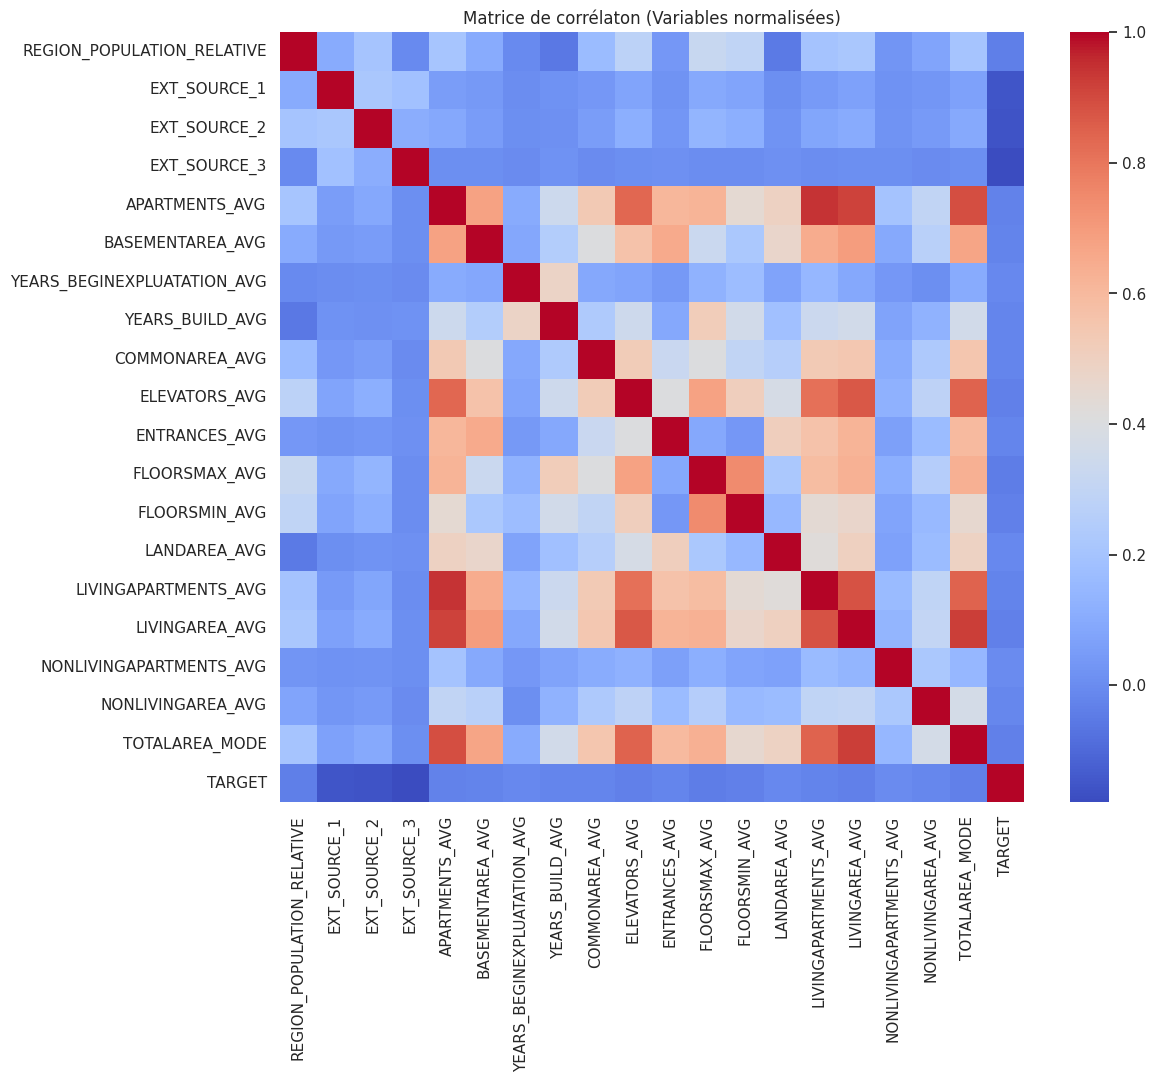

In [83]:
create_correlation_matrix(application_train_dropped_cols, 'TARGET', normalized_cols, 'Matrice de corrélaton (Variables normalisées)', annot=False)

**Interprétation**

**Feature engineering recommandé**
- Supprimer les variables fortement corrélées
  - `LIVINGAPARTMENTS_AVG`
  - `LIVINGAREA_AVG`